# Import Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Reading Dataset

In [ ]:
df=pd.read_excel(r"path to dataset")  # reading excel file
pd.set_option("display.max_column",22)
df.head()     #to display top 5 rows

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2.0,0.00,41.9136
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3.0,0.00,219.5820
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,0.00,6.8714
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2.0,0.20,2.5164


In [3]:
df.shape    #shape of dataframe

(9994, 21)

In [4]:
df.info()  #information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9985 non-null   float64       
 1   Order ID       9981 non-null   object        
 2   Order Date     9981 non-null   datetime64[ns]
 3   Ship Date      9979 non-null   datetime64[ns]
 4   Ship Mode      9975 non-null   object        
 5   Customer ID    9968 non-null   object        
 6   Customer Name  9937 non-null   object        
 7   Segment        9942 non-null   object        
 8   Country        9930 non-null   object        
 9   City           9949 non-null   object        
 10  State          9937 non-null   object        
 11  Postal Code    9957 non-null   float64       
 12  Region         9954 non-null   object        
 13  Product ID     9956 non-null   object        
 14  Category       9965 non-null   object        
 15  Sub-Category   9952 n

In [5]:
df.isnull().sum() #finding number of null values in each column

Row ID            9
Order ID         13
Order Date       13
Ship Date        15
Ship Mode        19
Customer ID      26
Customer Name    57
Segment          52
Country          64
City             45
State            57
Postal Code      37
Region           40
Product ID       38
Category         29
Sub-Category     42
Product Name     58
Sales            62
Quantity         46
Discount         37
Profit           50
dtype: int64

In [6]:
df.isnull().sum()/df.shape[0]*100   #percentage of missing values in each columns

Row ID           0.090054
Order ID         0.130078
Order Date       0.130078
Ship Date        0.150090
Ship Mode        0.190114
Customer ID      0.260156
Customer Name    0.570342
Segment          0.520312
Country          0.640384
City             0.450270
State            0.570342
Postal Code      0.370222
Region           0.400240
Product ID       0.380228
Category         0.290174
Sub-Category     0.420252
Product Name     0.580348
Sales            0.620372
Quantity         0.460276
Discount         0.370222
Profit           0.500300
dtype: float64

In [7]:
df.duplicated().sum()  #duplicate rows

10

In [8]:
for i in df.select_dtypes(include="object").columns:   #counts number of unique values
    print(df[i].value_counts())
    print("***"*10)

CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
US-2015-126977    10
                  ..
US-2017-107636     1
US-2014-165862     1
CA-2016-101448     1
US-2017-117331     1
CA-2017-119914     1
Name: Order ID, Length: 5000, dtype: int64
******************************
Standard Class    5958
Second Class      1940
First Class       1534
Same Day           543
Name: Ship Mode, dtype: int64
******************************
WB-21850    37
AP-10915    35
PP-18955    34
JL-15835    34
MA-17560    34
            ..
LD-16855     1
AO-10810     1
CJ-11875     1
RE-19405     1
JR-15700     1
Name: Customer ID, Length: 793, dtype: int64
******************************
William Brown        37
Arthur Prichep       35
John Lee             34
Paul Prost           34
Matt Abelman         34
                     ..
Lela Donovan          1
Jocasta Rupert        1
Carl Jackson          1
Anthony O'Donnell     1
Ricardo Emerson       1
Name: Customer Name, Length: 792, dty

#Converting DataType of sales from object to float (datatype was object because there were some string values in column,this process convert string to nan )

In [9]:
df["Sales"]=pd.to_numeric(df["Sales"],errors='coerce')   
pro=df[df["Sales"].isna()]
print(pro)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
193    194.0  CA-2015-102281 2015-10-12 2015-10-14     First Class   
194    195.0  CA-2015-131457 2015-10-31 2015-11-06  Standard Class   
195    196.0  CA-2014-140004 2014-03-21 2014-03-25  Standard Class   
196    197.0  CA-2014-140004 2014-03-21 2014-03-25  Standard Class   
197    198.0  CA-2017-107720 2017-11-06 2017-11-13  Standard Class   
...      ...             ...        ...        ...             ...   
7177  7187.0  CA-2017-133102 2017-08-17 2017-08-24  Standard Class   
7178  7188.0  CA-2017-133102 2017-08-17 2017-08-24  Standard Class   
7179  7189.0  CA-2017-133102 2017-08-17 2017-08-24  Standard Class   
7180  7190.0  CA-2016-164399 2016-11-12 2016-11-15     First Class   
7181  7191.0  CA-2016-164399 2016-11-12 2016-11-15     First Class   

     Customer ID      Customer Name      Segment        Country  \
193     MP-17470        Mark Packer  Home Office  United States   
194     MZ-17515         

In [10]:
df.isnull().sum() #checking number of null values for eah column

Row ID            9
Order ID         13
Order Date       13
Ship Date        15
Ship Mode        19
Customer ID      26
Customer Name    57
Segment          52
Country          64
City             45
State            57
Postal Code      37
Region           40
Product ID       38
Category         29
Sub-Category     42
Product Name     58
Sales            83
Quantity         46
Discount         37
Profit           50
dtype: int64

In [11]:
df[df["Row ID"]==6858] #checking row that has changed from string to nan

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6857,6858.0,CA-2017-128965,2017-04-17,2017-04-22,Standard Class,PS-18760,Pamela Stobb,Consumer,United States,Los Angeles,California,90008.0,West,OFF-PA-10004911,Office Supplies,Paper,Paper,NaN,28.14,3.0,0.0


In [12]:
df.dropna(subset=["Sales"],inplace=True)  #droping null values of sales(we cant impute data in sales(dependent variable) because it creates a arbitary values whih affects model prediction)

In [13]:
df.shape #shape of dataframe

(9911, 21)

In [14]:
df["Sales"].dtypes #cheking dataframe of sales column

dtype('float64')

In [15]:
df.isnull().sum() #checking number of null values

Row ID            9
Order ID         13
Order Date       13
Ship Date        15
Ship Mode        19
Customer ID      26
Customer Name    46
Segment          41
Country          53
City             45
State            51
Postal Code      31
Region           31
Product ID       11
Category          2
Sub-Category      4
Product Name      4
Sales             0
Quantity          0
Discount          0
Profit           13
dtype: int64

In [16]:
df["City"].isnull().sum() #cheking number of null values in city

45

In [17]:
df["City"].unique() #hecking unique values in city column

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', nan, 'Aurora', 'Charlotte', 'Orland Park',
       'Urbandale', 'Columbus', 'Bristol', 'Wilmington', 'Bloomington',
       'Phoenix', 'Roseville', 'Independence', 'Pasadena', 'Newark',
       'Franklin', 'Scottsdale', 'San Jose', 'Edmond', 'Carlsbad',
       'San Antonio', 'Monroe', 'Fairfield', 'Grand Prairie', 'Denver',
       'Dallas', 'Whittier', 'Saginaw', 'Medina', 'Detroit', 'Tampa',
       'Santa Clara', 'Lakeville', 'San Diego', 'Brentwood',
       'Chapel Hill', 'Morristown', 'Cincinnati', 'Inglewood', 'Portland',
       'Tamarac', 'Colorado Springs

In [18]:
df.dropna(subset=["City"],inplace=True) #droped nan values in city 

In [19]:
df.isnull().sum() #checking null values 

Row ID            5
Order ID          9
Order Date        9
Ship Date        11
Ship Mode         8
Customer ID       5
Customer Name    23
Segment          18
Country          21
City              0
State             6
Postal Code       0
Region            0
Product ID        2
Category          2
Sub-Category      4
Product Name      4
Sales             0
Quantity          0
Discount          0
Profit           13
dtype: int64

In [20]:
df.shape #shape of dataframe

(9866, 21)

In [21]:
df["State"].isnull().sum() #checking null values in state

6

In [22]:
df["State"].unique() #finding unique values in state column

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Oregon', 'Massachusetts', 'Georgia', 'Nevada',
       'Rhode Island', nan, 'Mississippi', 'Arkansas', 'Montana',
       'New Hampshire', 'Maryland', 'District of Columbia', 'Kansas',
       'Vermont', 'Maine', 'South Dakota', 'Idaho', 'North Dakota',
       'Wyoming', 24.849999999999998, 12.624, 89.584, 471.92,
       18.180000000000003, 31.744, 5.904, 621.7600000000001, 59.98, 48.87,
       154.9, 5.92, 30.18, 24.1, 8.78, 376.74, 29.52, 11.96,
       26.400000000000002, 'West Virginia'], dtype=object)

In [23]:
state_city=df[["State","City"]]  #created dataframe for state, city
unique_state_city=state_city.drop_duplicates() #drop dupliates
unique_state_city.head(10)  #hecking respective city name for state to change errors in state column 

,State,City
0,Kentucky,Henderson
2,California,Los Angeles
3,Florida,Fort Lauderdale
12,North Carolina,Concord
13,Washington,Seattle
14,Texas,Fort Worth
16,Wisconsin,Madison
17,Utah,West Jordan
18,California,San Francisco
21,Nebraska,Fremont


In [24]:
a=[24.849999999999998, 12.624, 89.584, 471.92,
       18.180000000000003, 31.744, 5.904, 621.7600000000001, 59.98, 48.87,
       154.9, 5.92, 30.18, 24.1, 8.78, 376.74, 29.52, 11.96,
       26.400000000000002]   #values are errors in state column
for i in a:
    print(df[df["State"]==i])

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
6972  6973.0  CA-2017-153822 2017-09-19 2017-09-25  Standard Class   

     Customer ID  Customer Name   Segment        Country     City  State  \
6972    AB-10105  Adrian Barton  Consumer  United States  Phoenix  24.85   

      Postal Code Region Product ID    Category Sub-Category  \
6972          5.0      0     7.7035  Technology       Phones   

                                   Product Name   Sales  Quantity  Discount  \
6972  Polycom VoiceStation 500 Conference phone  471.92       2.0       0.2   

      Profit  
6972  29.495  
      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
6973  6974.0  CA-2017-153822 2017-09-19 2017-09-25  Standard Class   

     Customer ID  Customer Name   Segment        Country     City   State  \
6973    AB-10105  Adrian Barton  Consumer  United States  Phoenix  12.624   

      Postal Code Region Product ID         Category Sub-Category  \
6973          2.0    0.

In [25]:
df[df["State"].isnull()] #checking nul values in state

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
416,417.0,CA-2017-122105,2017-06-24,2017-06-28,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Huntington Beach,NaN,92646.0,West,OFF-AR-10004344,NaN,Art,Bulldog Vacuum Base Pencil Sharpener,95.920,8.0,0.0,25.8984
423,424.0,CA-2017-125388,2017-10-19,2017-10-23,NaN,MP-17965,Michael Paige,Corporate,United States,Lawrence,NaN,1841.0,East,OFF-ST-10000918,Office Supplies,Storage,Crate-A-Files,32.700,3.0,0.0,8.5020
428,429.0,CA-2017-152275,2017-10-01,2017-10-08,Standard Class,KH-16630,Ken Heidel,Corporate,United States,San Antonio,NaN,78207.0,Central,OFF-AR-10000369,NaN,Art,Design Ebony Sketching Pencil,6.672,6.0,0.2,0.5004
430,431.0,US-2016-123750,2016-04-15,2016-04-21,Standard Class,RB-19795,Ross Baird,Home Office,United States,Gastonia,NaN,28052.0,South,TEC-AC-10004659,Technology,NaN,Imation Secure+ Hardware Encrypted USB 2.0 Fla...,408.744,7.0,0.2,76.6395
486,487.0,CA-2017-140963,2017-06-10,2017-06-13,First Class,MT-18070,Michelle Tran,Home Office,United States,Los Angeles,NaN,90045.0,West,TEC-PH-10001924,Technology,Phones,NaN,279.960,5.0,0.2,17.4975
659,660.0,CA-2015-146563,2015-08-24,2015-08-28,Standard Class,CB-12025,NaN,Consumer,United States,Arlington,NaN,76017.0,Central,OFF-ST-10001490,Office Supplies,NaN,"Hot File 7-Pocket, Floor Stand",999.432,7.0,0.2,124.9290


In [26]:
df[df["City"]=="Huntington Beach"].head(2) #checkin city name to replace nan with respective state name

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
416,417.0,CA-2017-122105,2017-06-24,2017-06-28,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Huntington Beach,NaN,92646.0,West,OFF-AR-10004344,NaN,Art,Bulldog Vacuum Base Pencil Sharpener,95.92,8.0,0.0,25.8984
1890,1891.0,CA-2014-157623,2014-03-14,2014-03-18,Standard Class,DK-13225,Dean Katz,Corporate,United States,Huntington Beach,California,92646.0,West,OFF-PA-10001204,Office Supplies,Paper,Xerox 1972,10.56,2.0,0.0,4.7520


In [27]:
df[df["State"]=="Maryland"].head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
887,888.0,CA-2017-150707,2017-10-14,2017-10-19,Standard Class,EL-13735,Ed Ludwig,Home Office,United States,Columbia,Maryland,21044.0,East,OFF-BI-10001078,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",37.66,7.0,0.0,18.4534
1093,1094.0,CA-2015-165085,2015-12-27,2015-12-31,Standard Class,BT-11485,Brad Thomas,Home Office,United States,Clinton,Maryland,20735.0,East,OFF-PA-10000605,Office Supplies,Paper,Xerox 1950,28.90,5.0,0.0,14.1610
1094,1095.0,CA-2015-165085,2015-12-27,2015-12-31,Standard Class,BT-11485,Brad Thomas,Home Office,United States,Clinton,Maryland,20735.0,East,OFF-AP-10002518,Office Supplies,Appliances,Kensington 7 Outlet MasterPiece Power Center,355.96,2.0,0.0,103.2284


In [28]:
city_to_state = {
    'Phoenix': 'Arizona',
    'Houston': 'Texas',
    'Gilbert': 'Arizona',
    'Jonesboro': 'Arkansas',
    'Atlanta': 'Georgia',
    'Los Angeles': 'California',
    'New York City': 'New York',
    'Detroit': 'Michigan',
    'Fort Lauderdale': 'Florida',
    'Hampton': 'Virginia',
    'Arlington':'Virginia',
    'Gastonia':'North Carolina', 
    'San Antonio':'Texas',
    'Lawrence':'Massachusetts',
    'Huntington Beach':'California'
}

# Update 'State' column for cities in city_to_state dictionary
df['State'] = df['City'].map(city_to_state).fillna(df['State'])

print(df)

      Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0        1.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1        2.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2        3.0  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3        4.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4        5.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989     NaN             NaN        NaT        NaT  Standard Class   
9990     NaN             NaN        NaT        NaT    Second Class   
9991     NaN             NaN        NaT        NaT  Standard Class   
9992     NaN             NaN        NaT        NaT  Standard Class   
9993     NaN             NaN        NaT        NaT    Second Class   

     Customer ID    Customer Name      Segment        Country  \
0       CG-12520      Claire Gute     Consumer  United States   
1       CG-12520      Claire 

In [29]:
#checking changes
df[df["City"]=="Huntington Beach"].head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
416,417.0,CA-2017-122105,2017-06-24,2017-06-28,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Huntington Beach,California,92646.0,West,OFF-AR-10004344,NaN,Art,Bulldog Vacuum Base Pencil Sharpener,95.92,8.0,0.0,25.8984
1890,1891.0,CA-2014-157623,2014-03-14,2014-03-18,Standard Class,DK-13225,Dean Katz,Corporate,United States,Huntington Beach,California,92646.0,West,OFF-PA-10001204,Office Supplies,Paper,Xerox 1972,10.56,2.0,0.0,4.7520


In [30]:
df["State"].isnull().sum() #cheking number of nulls in state

0

In [31]:
#now null also chnaged
df[df["Row ID"]==107]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
106,107.0,CA-2017-119004,2017-11-23,2017-11-28,Standard Class,JM-15250,Janet Martin,Consumer,United States,Charlotte,North Carolina,28205.0,South,TEC-AC-10003499,Technology,Accessories,Memorex Mini Travel Drive 8 GB USB 2.0 Flash D...,74.112,8.0,0.2,17.6016


In [32]:
#drop 11.96 due to no name of state
df.drop(df[df["State"]==11.96].index,axis=0,inplace=True)

In [33]:
df["State"].unique() #now rechecking uniques values in state 

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Oregon', 'Massachusetts', 'Georgia', 'Nevada',
       'Rhode Island', 'Mississippi', 'Arkansas', 'Montana',
       'New Hampshire', 'Maryland', 'District of Columbia', 'Kansas',
       'Vermont', 'Maine', 'South Dakota', 'Idaho', 'North Dakota',
       'Wyoming', 'West Virginia'], dtype=object)

In [34]:
df["Region"].unique() #hecking unique values in region(found some errors)

array(['South', 'West', 'Central', 'East', 0, 0.2, 0.7, 0.1], dtype=object)

In [35]:
df["Region"].isnull().sum() #checking nan values in region column

0

In [36]:
a = [0, 0.2, 0.7, 0.1]
cities_by_region = {}

for i in a:
    filtered_df = df[df["Region"] == i]
    cities_by_region[i] = filtered_df["City"].tolist()

print(cities_by_region)


{0: ['Phoenix', 'New York City', 'New York City', 'Detroit', 'Detroit', 'Detroit', 'Detroit', 'Detroit', 'Fort Lauderdale', 'Hampton'], 0.2: ['Phoenix', 'Houston', 'Gilbert', 'Jonesboro', 'Atlanta', 'Los Angeles'], 0.7: ['Gilbert'], 0.1: ['Detroit']}


In [37]:
df[df["City"]=="Huntington Beach"].head(2) #checking region for city 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
416,417.0,CA-2017-122105,2017-06-24,2017-06-28,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Huntington Beach,California,92646.0,West,OFF-AR-10004344,NaN,Art,Bulldog Vacuum Base Pencil Sharpener,95.92,8.0,0.0,25.8984
1890,1891.0,CA-2014-157623,2014-03-14,2014-03-18,Standard Class,DK-13225,Dean Katz,Corporate,United States,Huntington Beach,California,92646.0,West,OFF-PA-10001204,Office Supplies,Paper,Xerox 1972,10.56,2.0,0.0,4.7520


In [38]:
city_to_region = {
    'Phoenix': 'West',
    'Houston': 'Central',
    'Gilbert': 'West',
    'Jonesboro': 'South',
    'Atlanta': 'South',
    'Los Angeles': 'West',
    'New York City': 'East',
    'Detroit': 'Central',
    'Fort Lauderdale': 'South',
    'Hampton': 'South'
}

# Update 'Region' column permanently
df['Region'] = df['City'].map(city_to_region).fillna(df['Region'])

In [39]:
df["Region"].unique() #cheking unique values in region

array(['South', 'West', 'Central', 'East'], dtype=object)

In [40]:
df.shape #cheking shape of dataframe

(9865, 21)

In [41]:
df.dropna(subset=["Order Date","Ship Date"],inplace=True) #droping null values in order date,ship date

In [42]:
df.isnull().sum() #checking null values in columns

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         4
Customer ID       1
Customer Name    19
Segment          15
Country          18
City              0
State             0
Postal Code       0
Region            0
Product ID        2
Category          2
Sub-Category      4
Product Name      4
Sales             0
Quantity          0
Discount          0
Profit           13
dtype: int64

In [43]:
#data formating(creating new columns from existing data)
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y")

df["order_year"]=df["Order Date"].dt.year
df["order_month"]=df["Order Date"].dt.month
df["order_date"]=df["Order Date"].dt.day

df["Ship_year"]=df["Ship Date"].dt.year
df["Ship_month"]=df["Ship Date"].dt.month
df["Ship_date"]=df["Ship Date"].dt.day

In [44]:
df["Postal Code"].isnull().sum() #sum of null values in Postal code

0

In [45]:
s=df["Postal Code"].astype(int) #unique postal code
s.unique()

array([42420, 90036, 33311, 90032, 28027, 98103, 76106, 53711, 84084,
       94109, 68025, 19140, 84057, 90049, 77095, 75080, 77041, 60540,
       32935, 55122, 48185, 19901, 47150, 10024, 12180, 90004, 60610,
       85234, 22153, 10009, 49201, 38109, 77070, 35601, 94122, 27707,
       60623, 29203, 55901, 80013, 28205, 60462, 10035, 50322, 43229,
       37620, 19805, 61701, 85023, 95661, 64055, 91104, 43055, 53132,
       85254, 95123, 98105, 98115, 73034, 90045, 19134, 88220, 78207,
       77036, 62521, 71203,  6824, 75051, 80219, 75220, 37064, 90604,
       48601, 44256, 48227, 38401, 33614, 95051, 55044, 92037, 77506,
       94513, 27514,  7960, 45231, 94110, 90301, 97206, 33319, 80906,
        7109, 48180,  8701, 22204, 80004,  7601, 33710, 19143, 90805,
       92345, 37130, 78745,  1852, 31907,  6040, 78550, 85705, 62301,
        2038, 33024, 98198, 61604, 89115,  2886, 33180, 28403, 92646,
       40475, 80027,  1841, 39212, 48187, 10801, 28052, 32216, 47201,
       13021, 44312,

In [46]:
a=[5,2,4,9,3,1] #errors in postal code
c=df[df["Postal Code"].isin(a)]
c

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
6972,6973.0,CA-2017-153822,2017-09-19,2017-09-25,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Phoenix,Arizona,...,Polycom VoiceStation 500 Conference phone,471.920,2.0,0.2,29.4950,2017,9,19,2017,9,25
6973,6974.0,CA-2017-153822,2017-09-19,2017-09-25,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Phoenix,Arizona,...,Plastic Binding Combs,18.180,4.0,0.7,-13.9380,2017,9,19,2017,9,25
6974,6975.0,CA-2017-146185,2017-09-15,2017-09-19,Standard Class,CC-12145,Charles Crestani,Consumer,United States,Houston,Texas,...,Prismacolor Color Pencil Set,31.744,2.0,0.2,8.3328,2017,9,15,2017,9,19
6975,6976.0,CA-2015-112144,2015-06-28,2015-07-02,Standard Class,CY-12745,Craig Yedwab,Corporate,United States,Gilbert,Arizona,...,Avery 501,5.904,2.0,0.2,1.9926,2015,6,28,2015,7,2
6976,6977.0,CA-2015-112144,2015-06-28,2015-07-02,Standard Class,CY-12745,Craig Yedwab,Corporate,United States,Gilbert,Arizona,...,Electrix Halogen Magnifier Lamp,621.760,4.0,0.2,46.6320,2015,6,28,2015,7,2
6977,6978.0,US-2016-119298,2016-11-25,2016-11-28,First Class,EP-13915,Emily Phan,Consumer,United States,Jonesboro,Arkansas,...,OtterBox Defender Series Case - Samsung Galaxy S4,59.980,2.0,0.0,17.9940,2016,11,25,2016,11,28
6978,6979.0,CA-2017-155159,2017-11-25,2017-11-29,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Atlanta,Georgia,...,"Wirebound Message Book, 4 per Page",48.870,9.0,0.0,23.9463,2017,11,25,2017,11,29
6979,6980.0,CA-2017-149076,2017-01-14,2017-01-19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Los Angeles,California,...,Xerox 19,154.900,5.0,0.0,69.7050,2017,1,14,2017,1,19
6980,6981.0,CA-2014-146990,2014-11-07,2014-11-08,First Class,BP-11095,Bart Pistole,Corporate,United States,New York City,New York,...,Binder Clips by OIC,5.920,4.0,0.0,2.8416,2014,11,7,2014,11,8
6981,6982.0,CA-2014-146990,2014-11-07,2014-11-08,First Class,BP-11095,Bart Pistole,Corporate,United States,New York City,New York,...,Riverleaf Stik-Withit Designer Note Cubes,30.180,3.0,0.0,13.8828,2014,11,7,2014,11,8


In [47]:
#finding most frequent postal code for city
cities = ["Phoenix", "Houston", "Gilbert", "Jonesboro", "Atlanta", "Los Angeles", "New York City", "Detroit", "Fort Lauderdale", "Abilene", "Hampton"]

for city in cities:
    filtered_df = df[df["City"] == city]
    if filtered_df.empty:
        print(f"No rows found for city: {city}")
    else:
        postal_code_mode = filtered_df["Postal Code"].mode()[0]
        print(f"Most frequent postal code for city {city}: {postal_code_mode}")

Most frequent postal code for city Phoenix: 85023.0
Most frequent postal code for city Houston: 77041.0
Most frequent postal code for city Gilbert: 85234.0
Most frequent postal code for city Jonesboro: 72401.0
Most frequent postal code for city Atlanta: 30318.0
Most frequent postal code for city Los Angeles: 90049.0
Most frequent postal code for city New York City: 10035.0
Most frequent postal code for city Detroit: 48227.0
Most frequent postal code for city Fort Lauderdale: 33311.0
No rows found for city: Abilene
Most frequent postal code for city Hampton: 23666.0


In [48]:
city_to_region = {
    'Phoenix': 85023.0,
    'Houston': 77041.0,
    'Gilbert': 85234.0,
    'Jonesboro': 72401.0,
    'Atlanta': 30318.0,
    'Los Angeles': 90049.0,
    'New York City': 10035.0,
    'Detroit': 48227.0,
    'Fort Lauderdale': 33311.0,
    'Abilene': 77041.0,
    'Hampton': 23666.0
}

# Update 'Region' column permanently
c['Postal Code'] = c['City'].map(city_to_region).fillna(c['Postal Code'])

C:\Users\ganesh\AppData\Local\Temp\ipykernel_49052\1011837133.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['Postal Code'] = c['City'].map(city_to_region).fillna(c['Postal Code'])


In [49]:
c

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
6972,6973.0,CA-2017-153822,2017-09-19,2017-09-25,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Phoenix,Arizona,...,Polycom VoiceStation 500 Conference phone,471.920,2.0,0.2,29.4950,2017,9,19,2017,9,25
6973,6974.0,CA-2017-153822,2017-09-19,2017-09-25,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Phoenix,Arizona,...,Plastic Binding Combs,18.180,4.0,0.7,-13.9380,2017,9,19,2017,9,25
6974,6975.0,CA-2017-146185,2017-09-15,2017-09-19,Standard Class,CC-12145,Charles Crestani,Consumer,United States,Houston,Texas,...,Prismacolor Color Pencil Set,31.744,2.0,0.2,8.3328,2017,9,15,2017,9,19
6975,6976.0,CA-2015-112144,2015-06-28,2015-07-02,Standard Class,CY-12745,Craig Yedwab,Corporate,United States,Gilbert,Arizona,...,Avery 501,5.904,2.0,0.2,1.9926,2015,6,28,2015,7,2
6976,6977.0,CA-2015-112144,2015-06-28,2015-07-02,Standard Class,CY-12745,Craig Yedwab,Corporate,United States,Gilbert,Arizona,...,Electrix Halogen Magnifier Lamp,621.760,4.0,0.2,46.6320,2015,6,28,2015,7,2
6977,6978.0,US-2016-119298,2016-11-25,2016-11-28,First Class,EP-13915,Emily Phan,Consumer,United States,Jonesboro,Arkansas,...,OtterBox Defender Series Case - Samsung Galaxy S4,59.980,2.0,0.0,17.9940,2016,11,25,2016,11,28
6978,6979.0,CA-2017-155159,2017-11-25,2017-11-29,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Atlanta,Georgia,...,"Wirebound Message Book, 4 per Page",48.870,9.0,0.0,23.9463,2017,11,25,2017,11,29
6979,6980.0,CA-2017-149076,2017-01-14,2017-01-19,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Los Angeles,California,...,Xerox 19,154.900,5.0,0.0,69.7050,2017,1,14,2017,1,19
6980,6981.0,CA-2014-146990,2014-11-07,2014-11-08,First Class,BP-11095,Bart Pistole,Corporate,United States,New York City,New York,...,Binder Clips by OIC,5.920,4.0,0.0,2.8416,2014,11,7,2014,11,8
6981,6982.0,CA-2014-146990,2014-11-07,2014-11-08,First Class,BP-11095,Bart Pistole,Corporate,United States,New York City,New York,...,Riverleaf Stik-Withit Designer Note Cubes,30.180,3.0,0.0,13.8828,2014,11,7,2014,11,8


In [50]:
df = pd.concat([df, c], ignore_index=True) #conactinating the new dataframe with existing dataframe df 

In [51]:
df.shape #shape of data frame

(9872, 27)

In [52]:
df.drop(df[df["Postal Code"].isin(a)].index,inplace=True) #droping rows that have error in postal code after imputing with correct values

In [53]:
df[df["Row ID"]==6973]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
9854,6973.0,CA-2017-153822,2017-09-19,2017-09-25,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Phoenix,Arizona,...,Polycom VoiceStation 500 Conference phone,471.92,2.0,0.2,29.495,2017,9,19,2017,9,25


In [54]:
df["Postal Code"].unique() #unique values in data frame

array([42420., 90036., 33311., 90032., 28027., 98103., 76106., 53711.,
       84084., 94109., 68025., 19140., 84057., 90049., 77095., 75080.,
       77041., 60540., 32935., 55122., 48185., 19901., 47150., 10024.,
       12180., 90004., 60610., 85234., 22153., 10009., 49201., 38109.,
       77070., 35601., 94122., 27707., 60623., 29203., 55901., 80013.,
       28205., 60462., 10035., 50322., 43229., 37620., 19805., 61701.,
       85023., 95661., 64055., 91104., 43055., 53132., 85254., 95123.,
       98105., 98115., 73034., 90045., 19134., 88220., 78207., 77036.,
       62521., 71203.,  6824., 75051., 80219., 75220., 37064., 90604.,
       48601., 44256., 48227., 38401., 33614., 95051., 55044., 92037.,
       77506., 94513., 27514.,  7960., 45231., 94110., 90301., 97206.,
       33319., 80906.,  7109., 48180.,  8701., 22204., 80004.,  7601.,
       33710., 19143., 90805., 92345., 37130., 78745.,  1852., 31907.,
        6040., 78550., 85705., 62301.,  2038., 33024., 98198., 61604.,
      

In [55]:
df[df["Postal Code"].isin(a)] #rechecking is there any error in postal code

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date


In [56]:
df.isnull().sum() #checking sum of null values

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         4
Customer ID       1
Customer Name    19
Segment          15
Country          18
City              0
State             0
Postal Code       0
Region            0
Product ID        2
Category          2
Sub-Category      4
Product Name      4
Sales             0
Quantity          0
Discount          0
Profit           13
order_year        0
order_month       0
order_date        0
Ship_year         0
Ship_month        0
Ship_date         0
dtype: int64

In [57]:
# filled with united states as it has only one country
df['Country'].fillna('United States', inplace=True)

In [58]:
#filling nan values in object dtype columns with mode
for i in df.select_dtypes(include="object"):
    df[i].fillna(df[i].mode()[0],inplace=True)

In [59]:
#used knnimputer to impute null values in numerical columns except sales(as it is dependent variable)
impute=KNNImputer()
for i in df.select_dtypes(include="number").columns:
    if i != 'Sales':
        df[i] = impute.fit_transform(df[[i]])

In [60]:
df.isnull().sum() #checking sum of null values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
order_year       0
order_month      0
order_date       0
Ship_year        0
Ship_month       0
Ship_date        0
dtype: int64

In [61]:
df.dtypes #checking dtypes

Row ID                  float64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                float64
Discount                float64
Profit                  float64
order_year              float64
order_month             float64
order_date              float64
Ship_year               float64
Ship_month              float64
Ship_date               float64
dtype: object

In [62]:
df.dropna(inplace=True) #dropping all nan value rows

In [63]:
df.isnull().sum() #cheking null values in columns

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
order_year       0
order_month      0
order_date       0
Ship_year        0
Ship_month       0
Ship_date        0
dtype: int64

In [64]:
df.shape #checking shape

(9854, 27)

In [65]:
((9994-9854)/9994)*100 #checking perecntage of rows i deleted

1.4008405043025816

In [66]:
df.duplicated().sum() #checking number of duplicate rows

10

In [67]:
df.drop_duplicates(inplace=True) #droping duplicate rows

In [68]:
for i in df.columns:
    print(f"{i}:{df[i].unique()}\n")  #checking all unique values for each column

Row ID:[1.000e+00 2.000e+00 3.000e+00 ... 6.988e+03 6.989e+03 6.991e+03]

Order ID:['CA-2016-152156' 'CA-2016-138688' 'US-2015-108966' ... 'CA-2014-146990'
 'CA-2016-116526' 'CA-2017-158561']

Order Date:['2016-11-08T00:00:00.000000000' '2016-06-12T00:00:00.000000000'
 '2015-10-11T00:00:00.000000000' ... '2016-06-03T00:00:00.000000000'
 '2015-04-12T00:00:00.000000000' '2014-01-21T00:00:00.000000000']

Ship Date:['2016-11-11T00:00:00.000000000' '2016-06-16T00:00:00.000000000'
 '2015-10-18T00:00:00.000000000' ... '2015-05-23T00:00:00.000000000'
 '2014-01-23T00:00:00.000000000' '2017-03-03T00:00:00.000000000']

Ship Mode:['Second Class' 'Standard Class' 'First Class' 'Same Day']

Customer ID:['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 

In [69]:
df.columns #prints all columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'order_year',
       'order_month', 'order_date', 'Ship_year', 'Ship_month', 'Ship_date'],
      dtype='object')

In [70]:
#droping columns that are not required for analysis
df.drop(columns=['Row ID', 'Order ID',
       'Customer ID', 'Customer Name', 
       'Postal Code', 'Product ID','Order Date','Ship Date'],axis=1,inplace=True)

In [71]:
df.sample(5) #display random 5 samples

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
1938,Standard Class,Consumer,United States,Oklahoma City,Oklahoma,Central,Technology,Phones,Jabra Supreme Plus Driver Edition Headset,479.960,4.0,0.0,134.3888,2014.0,12.0,3.0,2014.0,12.0,9.0
4419,First Class,Home Office,United States,Aurora,Colorado,West,Office Supplies,Paper,Xerox 1992,14.352,3.0,0.2,5.2026,2017.0,9.0,28.0,2017.0,10.0,1.0
7769,Standard Class,Consumer,United States,Morgan Hill,California,West,Office Supplies,Art,Rogers Handheld Barrel Pencil Sharpener,21.920,8.0,0.0,5.9184,2016.0,12.0,3.0,2016.0,12.0,7.0
6763,Standard Class,Corporate,United States,Springfield,Virginia,South,Technology,Accessories,Imation 30456 USB Flash Drive 8GB,20.700,3.0,0.0,1.6560,2016.0,9.0,12.0,2016.0,9.0,17.0
1296,First Class,Corporate,United States,Jacksonville,North Carolina,South,Technology,Machines,Cisco CP-7937G Unified IP Conference Station P...,695.700,2.0,0.5,-27.8280,2017.0,1.0,2.0,2017.0,1.0,4.0


In [72]:
#data descriptive
df.describe()

,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
count,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000,9844.000000
mean,230.386939,3.790431,0.155312,28.970794,2015.719829,7.811560,15.460585,2015.735270,7.742686,15.854429
std,626.024933,2.224033,0.205817,235.713664,1.123452,3.284929,8.756378,1.126109,3.342078,8.807584
min,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,1.000000,2014.000000,1.000000,1.000000
25%,17.310000,2.000000,0.000000,1.757325,2015.000000,5.000000,8.000000,2015.000000,5.000000,8.000000
50%,54.804000,3.000000,0.200000,8.709500,2016.000000,9.000000,15.000000,2016.000000,9.000000,16.000000
75%,209.970000,5.000000,0.200000,29.460650,2017.000000,11.000000,23.000000,2017.000000,11.000000,24.000000
max,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,31.000000,2018.000000,12.000000,31.000000


In [73]:
# df.to_excel('C:/Users/ganesh/Downloads/cleanedata1.xlsx', index=False)

# Outlier Analysis

# Quantity Outlier Analysis 

In [74]:
#unique values 
df["Quantity"].unique()

array([ 2.,  3.,  5.,  7.,  4.,  6.,  9.,  1.,  8., 14., 11., 13., 10.,
       12.])

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


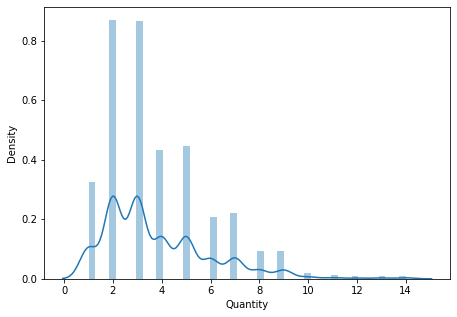

In [75]:
#distribution graph for quantity
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df["Quantity"])
plt.show()

In [76]:
#right skew
df["Quantity"].skew()

1.272389553355905

In [77]:
df["Quantity"].describe()

count    9844.000000
mean        3.790431
std         2.224033
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

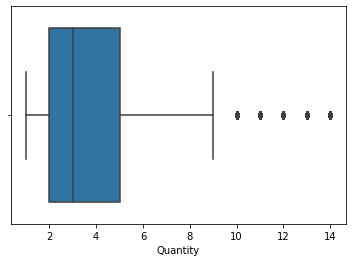

In [78]:
#box plot
sns.boxplot(df["Quantity"])

In [79]:
#Percentile Method
low=df["Quantity"].quantile(0.05)
high=df["Quantity"].quantile(0.95)
low,high

(1.0, 8.0)

In [80]:
df[df["Quantity"]>high]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
10,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,9.0,0.2,85.3092,2014.0,6.0,9.0,2014.0,6.0,14.0
37,Standard Class,Home Office,United States,Houston,Texas,Central,Office Supplies,Envelopes,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve...",113.328,9.0,0.2,35.4150,2015.0,12.0,27.0,2015.0,12.0,31.0
102,Second Class,Consumer,United States,Columbus,Ohio,East,Office Supplies,Fasteners,"OIC Colored Binder Clips, Assorted Sizes",40.096,14.0,0.2,14.5348,2014.0,8.0,25.0,2014.0,8.0,27.0
111,First Class,Consumer,United States,Wilmington,Delaware,East,Office Supplies,Envelopes,Globe Weis Peel & Seel First Class Envelopes,115.020,9.0,0.0,51.7590,2016.0,6.0,12.0,2016.0,6.0,15.0
124,Standard Class,Consumer,United States,Roseville,California,West,Furniture,Furnishings,Longer-Life Soft White Bulbs,43.120,14.0,0.0,20.6976,2016.0,10.0,13.0,2016.0,10.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9801,Standard Class,Consumer,United States,San Francisco,California,West,Technology,Accessories,Memorex Mini Travel Drive 16 GB USB 2.0 Flash ...,223.580,14.0,0.0,87.1962,2017.0,11.0,24.0,2017.0,11.0,30.0
9802,Standard Class,Consumer,United States,Anaheim,California,West,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",998.820,9.0,0.0,29.9646,2014.0,12.0,28.0,2015.0,1.0,3.0
9839,Standard Class,Home Office,United States,Los Angeles,California,West,Office Supplies,Binders,Ibico Recycled Linen-Style Covers,437.472,14.0,0.2,153.1152,2016.0,12.0,6.0,2016.0,12.0,10.0
9844,Standard Class,Consumer,United States,Long Beach,New York,East,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10.0,0.0,15.1200,2015.0,5.0,17.0,2015.0,5.0,23.0


In [81]:
#did because felt outliers are valid (so used capping)

In [82]:
#capping outliers
df["Quantity"]=np.where(df["Quantity"]>high,high,np.where(df["Quantity"]<low,low,df["Quantity"]))

In [83]:
df.shape

(9844, 19)

In [84]:
df[df["Quantity"]>=5]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015.0,10.0,11.0,2015.0,10.0,18.0
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0,0.00,14.1694,2014.0,6.0,9.0,2014.0,6.0,14.0
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6.0,0.20,90.7152,2014.0,6.0,9.0,2014.0,6.0,14.0
9,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0,0.00,34.4700,2014.0,6.0,9.0,2014.0,6.0,14.0
10,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,8.0,0.20,85.3092,2014.0,6.0,9.0,2014.0,6.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9860,Second Class,Consumer,United States,Atlanta,Georgia,South,Office Supplies,Paper,"Wirebound Message Book, 4 per Page",48.8700,8.0,0.00,23.9463,2017.0,11.0,25.0,2017.0,11.0,29.0
9861,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Paper,Xerox 19,154.9000,5.0,0.00,69.7050,2017.0,1.0,14.0,2017.0,1.0,19.0
9864,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Binders,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,24.1000,5.0,0.00,11.0860,2016.0,9.0,1.0,2016.0,9.0,5.0
9869,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Binders,"Wilson Jones 1"" Hanging DublLock Ring Binders",26.4000,5.0,0.00,12.6720,2016.0,9.0,1.0,2016.0,9.0,5.0


C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


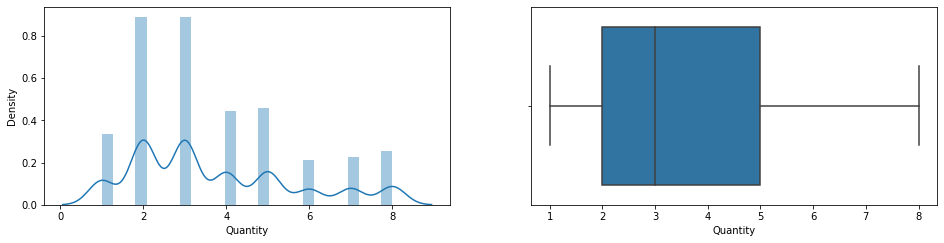

In [85]:
#distribution and box plot for quantity
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["Quantity"])

plt.subplot(2,2,2)
sns.boxplot(df["Quantity"])
                
plt.show()

In [86]:
#right skew
df["Quantity"].skew()

0.7107622703947052

# Disount Outlier Analysis

In [87]:
#unique values in discount
df["Discount"].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


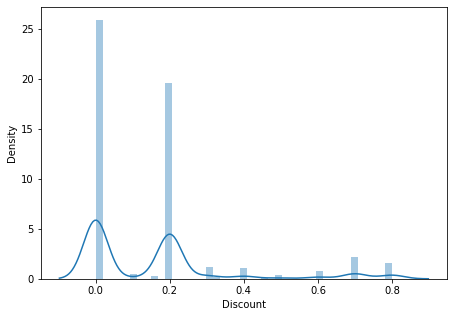

In [88]:
#distribution graph for discount
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df["Discount"])
plt.show()

In [89]:
#right skew
df["Discount"].skew()

1.6922053394888577

In [90]:
df["Discount"].describe()

count    9844.000000
mean        0.155312
std         0.205817
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount'>

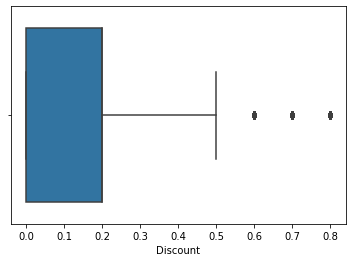

In [91]:
#boxplot
sns.boxplot(df["Discount"])

In [92]:
per25=df["Discount"].quantile(0.25)
per75=df["Discount"].quantile(0.75)
per25,per75

(0.0, 0.2)

In [93]:
#IQR(method)
iqr=per75-per25
low=per25-1.5*iqr
high=per75+1.5*iqr
low,high

(-0.30000000000000004, 0.5)

In [94]:
df[df["Discount"]>high]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5.0,0.8,-123.8580,2015.0,11.0,22.0,2015.0,11.0,26.0
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3.0,0.8,-3.8160,2015.0,11.0,22.0,2015.0,11.0,26.0
28,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,9.618,2.0,0.7,-7.0532,2015.0,9.0,17.0,2015.0,9.0,21.0
32,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.858,6.0,0.7,-5.7150,2015.0,9.0,17.0,2015.0,9.0,21.0
36,First Class,Corporate,United States,Richardson,Texas,Central,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5.0,0.6,-147.9630,2016.0,12.0,8.0,2016.0,12.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,First Class,Home Office,United States,Cleveland,Ohio,East,Office Supplies,Binders,Wilson Jones Clip & Carry Folder Binder Tool f...,8.700,5.0,0.7,-6.3800,2017.0,4.0,20.0,2017.0,4.0,21.0
9763,Standard Class,Consumer,United States,Carrollton,Texas,Central,Furniture,Furnishings,"GE General Use Halogen Bulbs, 100 Watts, 1 Bul...",25.128,3.0,0.6,-6.9102,2014.0,11.0,12.0,2014.0,11.0,18.0
9780,Standard Class,Corporate,United States,Bryan,Texas,Central,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",22.386,7.0,0.8,-35.8176,2016.0,3.0,15.0,2016.0,3.0,19.0
9781,Standard Class,Home Office,United States,Akron,Ohio,East,Office Supplies,Binders,Acco Expandable Hanging Binders,5.742,3.0,0.7,-4.5936,2014.0,11.0,24.0,2014.0,11.0,30.0


In [95]:
#capping outliers with high and low values
df["Discount"]=np.where(df["Discount"]>high,high,np.where(df["Discount"]<low,low,df["Discount"]))

In [96]:
df.shape

(9844, 19)

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


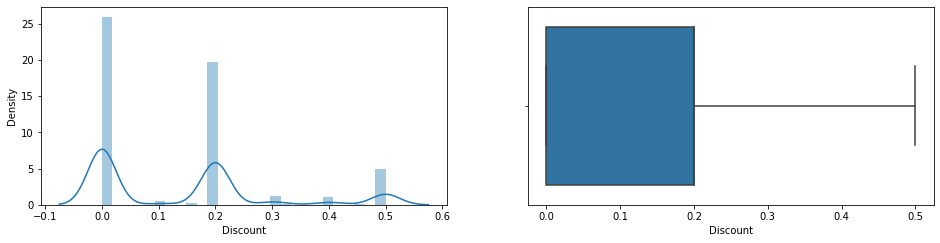

In [97]:
#distribution and box plot for discount
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["Discount"])
plt.subplot(2,2,2)
sns.boxplot(df["Discount"])
             
plt.show()

In [98]:
df.shape

(9844, 19)

In [99]:
#right skew
df["Discount"].skew()

0.9644235759205968

# Profit Outlier Analysis

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


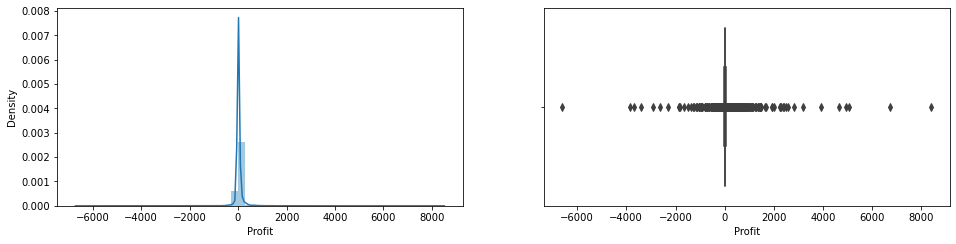

In [100]:
#distribution and boxplot graph for profit
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["Profit"])
plt.subplot(2,2,2)
sns.boxplot(df["Profit"])
plt.show()

In [101]:
#right skew
df["Profit"].skew()

7.532178434791842

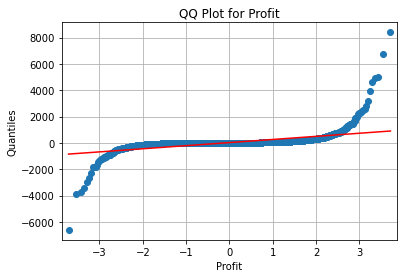

In [102]:
data = df

# Select the column you want to analyze
column_name = 'Profit'
column_data = data[column_name]

# Create the QQ plot using statsmodels.api
sm.qqplot(column_data, line='s')  # 's' for straight reference line
plt.xlabel(column_name)
plt.ylabel('Quantiles')
plt.title('QQ Plot for ' + column_name)
plt.grid(True)
plt.show()

In [103]:
df[df["Profit"]<=0]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015.0,10.0,11.0,2015.0,10.0,18.0
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0,0.50,-123.8580,2015.0,11.0,22.0,2015.0,11.0,26.0
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3.0,0.50,-3.8160,2015.0,11.0,22.0,2015.0,11.0,26.0
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2.0,0.30,-1.0196,2017.0,7.0,16.0,2017.0,7.0,18.0
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0,0.50,-1665.0522,2015.0,9.0,17.0,2015.0,9.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,Standard Class,Consumer,United States,San Bernardino,California,West,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4.0,0.15,-40.1960,2015.0,11.0,13.0,2015.0,11.0,17.0
9797,Second Class,Corporate,United States,Los Angeles,California,West,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2.0,0.20,-1.7772,2016.0,6.0,3.0,2016.0,6.0,6.0
9822,First Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4.0,0.32,-67.6704,2015.0,3.0,19.0,2015.0,3.0,22.0
9837,Standard Class,Home Office,United States,Los Angeles,California,West,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7.0,0.00,0.0000,2016.0,12.0,6.0,2016.0,12.0,10.0


<AxesSubplot:xlabel='Profit', ylabel='Sales'>

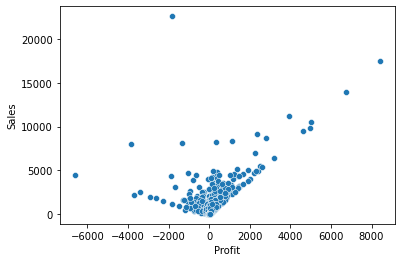

In [104]:
#scatterplot prfit vs sales
sns.scatterplot(x="Profit",y="Sales",data=df)

In [105]:
df[df["Profit"]<=0]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015.0,10.0,11.0,2015.0,10.0,18.0
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0,0.50,-123.8580,2015.0,11.0,22.0,2015.0,11.0,26.0
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3.0,0.50,-3.8160,2015.0,11.0,22.0,2015.0,11.0,26.0
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2.0,0.30,-1.0196,2017.0,7.0,16.0,2017.0,7.0,18.0
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0,0.50,-1665.0522,2015.0,9.0,17.0,2015.0,9.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,Standard Class,Consumer,United States,San Bernardino,California,West,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,683.3320,4.0,0.15,-40.1960,2015.0,11.0,13.0,2015.0,11.0,17.0
9797,Second Class,Corporate,United States,Los Angeles,California,West,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2.0,0.20,-1.7772,2016.0,6.0,3.0,2016.0,6.0,6.0
9822,First Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4.0,0.32,-67.6704,2015.0,3.0,19.0,2015.0,3.0,22.0
9837,Standard Class,Home Office,United States,Los Angeles,California,West,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7.0,0.00,0.0000,2016.0,12.0,6.0,2016.0,12.0,10.0


In [106]:
EPSILON = 1e-8
positive_profit = df['Profit'] + EPSILON

# Take the absolute value
abs_profit = np.abs(positive_profit)

# Apply the logarithm
log_profit = np.log(abs_profit)

# Restore the sign
transformed_profit = np.sign(df['Profit']) * log_profit

# Replace -0 with 0
transformed_profit = np.where(transformed_profit == -0, 0, transformed_profit)

# Add the transformed profit column to the DataFrame
df['Transformed_Profit'] = transformed_profit

In [107]:
df[df["Profit"]==0]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date,Transformed_Profit
201,Standard Class,Home Office,United States,Tampa,Florida,South,Furniture,Furnishings,Tenex Contemporary Contur Chairmats for Low an...,258.072,3.0,0.2,0.0,2017.0,4.0,7.0,2017.0,4.0,12.0,0.0
509,Second Class,Consumer,United States,San Francisco,California,West,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,1121.568,2.0,0.2,0.0,2016.0,4.0,15.0,2016.0,4.0,17.0,0.0
520,First Class,Consumer,United States,Seattle,Washington,West,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",3.960,2.0,0.0,0.0,2015.0,12.0,7.0,2015.0,12.0,9.0,0.0
526,Standard Class,Corporate,United States,Seattle,Washington,West,Furniture,Chairs,Hon Every-Day Series Multi-Task Chairs,451.152,3.0,0.2,0.0,2017.0,10.0,1.0,2017.0,10.0,8.0,0.0
775,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,Global Leather Executive Chair,1228.465,5.0,0.3,0.0,2014.0,6.0,28.0,2014.0,7.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9272,First Class,Consumer,United States,Los Angeles,California,West,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2803.920,5.0,0.2,0.0,2015.0,1.0,27.0,2015.0,1.0,29.0,0.0
9501,Standard Class,Corporate,United States,Seattle,Washington,West,Office Supplies,Storage,"Contico 72""H Heavy-Duty Storage System",204.900,5.0,0.0,0.0,2014.0,3.0,7.0,2014.0,3.0,12.0,0.0
9746,Standard Class,Consumer,United States,Lafayette,Indiana,Central,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",5.940,3.0,0.0,0.0,2014.0,1.0,23.0,2014.0,1.0,27.0,0.0
9758,Standard Class,Consumer,United States,Fairfield,Ohio,East,Furniture,Furnishings,"Deflect-o EconoMat Nonstudded, No Bevel Mat",82.640,2.0,0.2,0.0,2016.0,6.0,6.0,2016.0,6.0,10.0,0.0


In [108]:
# sum of null values
df["Transformed_Profit"].isnull().sum()

0

In [109]:
df[df["Transformed_Profit"]<=0]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date,Transformed_Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015.0,10.0,11.0,2015.0,10.0,18.0,-5.948116
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0,0.50,-123.8580,2015.0,11.0,22.0,2015.0,11.0,26.0,-4.819136
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3.0,0.50,-3.8160,2015.0,11.0,22.0,2015.0,11.0,26.0,-1.339203
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2.0,0.30,-1.0196,2017.0,7.0,16.0,2017.0,7.0,18.0,-0.019410
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0,0.50,-1665.0522,2015.0,9.0,17.0,2015.0,9.0,21.0,-7.417612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9797,Second Class,Corporate,United States,Los Angeles,California,West,Furniture,Tables,Hon 61000 Series Interactive Training Tables,71.0880,2.0,0.20,-1.7772,2016.0,6.0,3.0,2016.0,6.0,6.0,-0.575039
9804,Second Class,Home Office,United States,Seattle,Washington,West,Office Supplies,Storage,"Rogers Jumbo File, Granite",40.7400,3.0,0.00,0.4074,2015.0,4.0,12.0,2015.0,4.0,17.0,-0.897960
9822,First Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4.0,0.32,-67.6704,2015.0,3.0,19.0,2015.0,3.0,22.0,-4.214649
9837,Standard Class,Home Office,United States,Los Angeles,California,West,Office Supplies,Fasteners,"Alliance Big Bands Rubber Bands, 12/Pack",13.8600,7.0,0.00,0.0000,2016.0,12.0,6.0,2016.0,12.0,10.0,0.000000


In [110]:
df.head() #top 5 rows

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date,Transformed_Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,2016.0,11.0,8.0,2016.0,11.0,11.0,3.735610
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,2016.0,11.0,8.0,2016.0,11.0,11.0,5.391726
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,2016.0,6.0,12.0,2016.0,6.0,16.0,1.927368
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,2015.0,10.0,11.0,2015.0,10.0,18.0,-5.948116
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,2015.0,10.0,11.0,2015.0,10.0,18.0,0.922829


C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


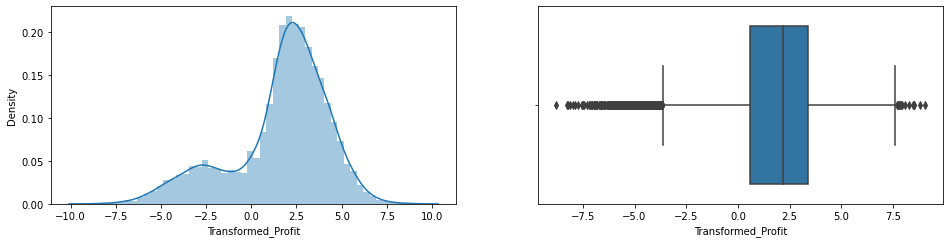

In [111]:
#distribution and boxplot for transformed profit
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["Transformed_Profit"])
plt.subplot(2,2,2)
sns.boxplot(df["Transformed_Profit"])
              
plt.show()

In [112]:
#left skew
df["Transformed_Profit"].skew()

-0.8874539960016707

In [113]:
df.shape

(9844, 20)

In [114]:
Q1 = df['Transformed_Profit'].quantile(0.25)
Q3 = df['Transformed_Profit'].quantile(0.75)

# Calculate IQR(Inter Quantile Range)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Transformed_Profit'] >= lower_bound) & (df['Transformed_Profit'] <= upper_bound)]

In [115]:
df.shape

(9844, 20)

In [116]:
#copying data in df
df=df_no_outliers.copy()

In [117]:
df.shape

(9233, 20)

In [118]:
#sum of null values in transformed profit
df['Transformed_Profit'].isnull().sum()

0

In [119]:
df.shape

(9233, 20)

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


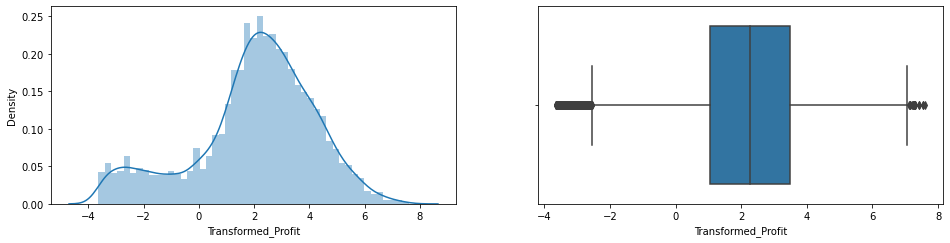

In [120]:
#distribution and box plot for transformed profit
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df["Transformed_Profit"])
plt.subplot(2,2,2)
sns.boxplot(df["Transformed_Profit"])
                
plt.show()

In [121]:
df["Transformed_Profit"].skew()

-0.6187364044245487

In [122]:
#display all columns
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'order_year', 'order_month', 'order_date',
       'Ship_year', 'Ship_month', 'Ship_date', 'Transformed_Profit'],
      dtype='object')

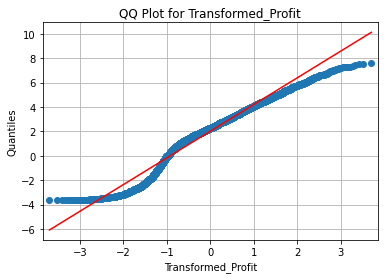

In [123]:
data = df

# Select the column you want to analyze
column_name = 'Transformed_Profit'
column_data = data[column_name]

# Create the QQ plot using statsmodels.api
sm.qqplot(column_data, line='s')  # 's' for straight reference line
plt.xlabel(column_name)
plt.ylabel('Quantiles')
plt.title('QQ Plot for ' + column_name)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='Transformed_Profit', ylabel='Sales'>

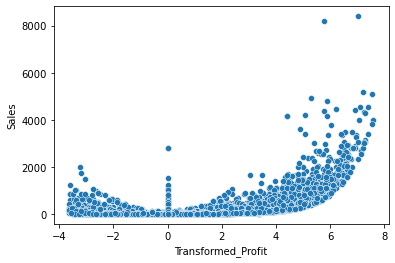

In [124]:
#Scatter plot sales vs transformed_profit
sns.scatterplot(x="Transformed_Profit",y="Sales",data=df)

# Sales Outlier Analysis

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


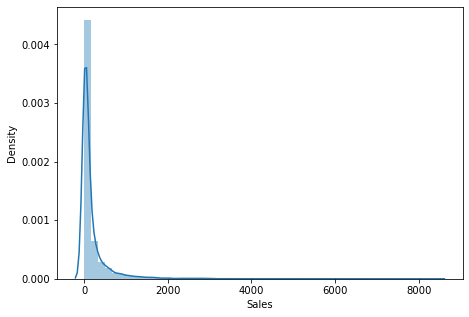

In [125]:
# sales data distribution graph

plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df["Sales"])
plt.show()

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

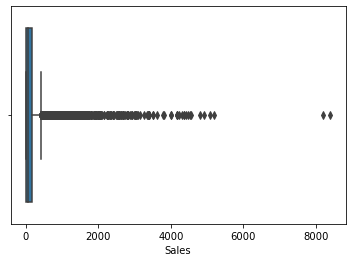

In [126]:
#box plot to check outliers
sns.boxplot(df["Sales"])

In [127]:
#checking skewnessin data
df["Sales"].skew() #right skew

5.945170113821082

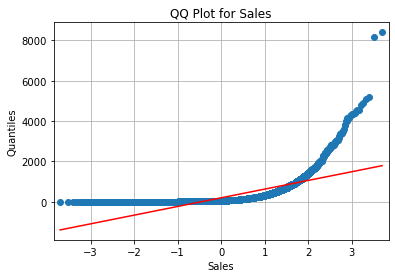

In [128]:
data = df

# Select the column you want to analyze
column_name = 'Sales'
column_data = data[column_name]

# Create the QQ plot using statsmodels.api
sm.qqplot(column_data, line='s')  # 's' for straight reference line
plt.xlabel(column_name)
plt.ylabel('Quantiles')
plt.title('QQ Plot for ' + column_name)
plt.grid(True)
plt.show()

In [129]:
#data transformation using log
df['Transformed_Sales'] = np.log(df['Sales'])

In [130]:
df.head() #top 5 rows display

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date,Transformed_Profit,Transformed_Sales
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2.0,0.0,41.9136,2016.0,11.0,8.0,2016.0,11.0,11.0,3.735610,5.568192
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3.0,0.0,219.5820,2016.0,11.0,8.0,2016.0,11.0,11.0,5.391726,6.595699
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2.0,0.0,6.8714,2016.0,6.0,12.0,2016.0,6.0,16.0,1.927368,2.682390
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2.0,0.2,2.5164,2015.0,10.0,11.0,2015.0,10.0,18.0,0.922829,3.107631
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7.0,0.0,14.1694,2014.0,6.0,9.0,2014.0,6.0,14.0,2.651085,3.888959


In [131]:
df.shape

(9233, 21)

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


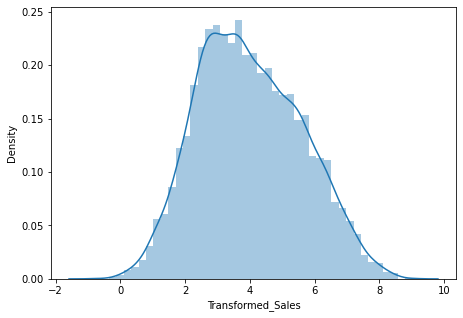

In [132]:
#distribution graph after transformation
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df["Transformed_Sales"])
plt.show()

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transformed_Sales'>

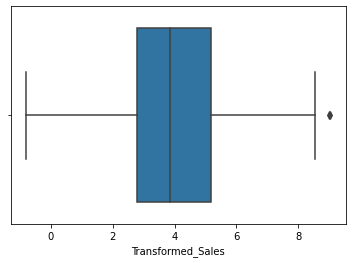

In [133]:
#boxplot 
sns.boxplot(df["Transformed_Sales"])

In [134]:
#right skewness
df["Transformed_Sales"].skew()

0.2193355558713904

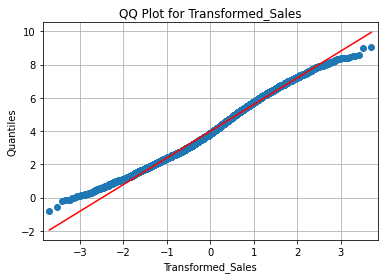

In [135]:
import statsmodels.api as sm
data = df

# Select the column you want to analyze
column_name = 'Transformed_Sales'
column_data = data[column_name]

# Create the QQ plot using statsmodels.api
sm.qqplot(column_data, line='s')  # 's' for straight reference line
plt.xlabel(column_name)
plt.ylabel('Quantiles')
plt.title('QQ Plot for ' + column_name)
plt.grid(True)
plt.show()

In [136]:
df.shape

(9233, 21)

In [137]:
#z_score technique to delete outliers
z_scores = (df['Transformed_Sales'] - df['Transformed_Sales'].mean()) / df['Transformed_Sales'].std()
outliers = df[np.abs(z_scores) > 3] 

In [138]:
#drop outliers
df = df.drop(outliers.index)

In [139]:
df.shape

(9231, 21)

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


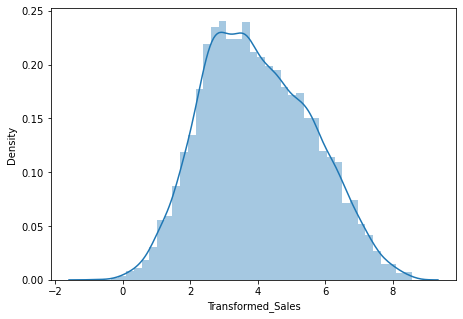

In [140]:
#distribution graph after outlier deletion
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.distplot(df["Transformed_Sales"])
plt.show()

C:\Users\ganesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transformed_Sales'>

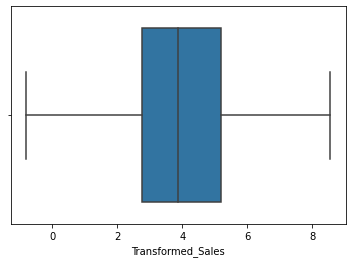

In [141]:
#box plot
sns.boxplot(df["Transformed_Sales"])

In [142]:
#skew
df["Transformed_Sales"].skew()

0.21540098687838372

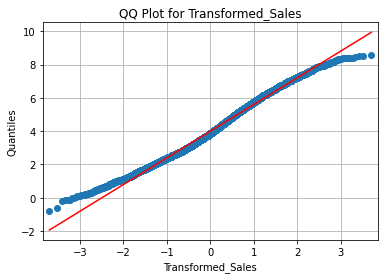

In [143]:
data = df

# Select the column you want to analyze
column_name = 'Transformed_Sales'
column_data = data[column_name]

# Create the QQ plot using statsmodels.api
sm.qqplot(column_data, line='s')  # 's' for straight reference line
plt.xlabel(column_name)
plt.ylabel('Quantiles')
plt.title('QQ Plot for ' + column_name)
plt.grid(True)
plt.show()

In [144]:
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date,Transformed_Profit,Transformed_Sales
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2.0,0.0,41.9136,2016.0,11.0,8.0,2016.0,11.0,11.0,3.735610,5.568192
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3.0,0.0,219.5820,2016.0,11.0,8.0,2016.0,11.0,11.0,5.391726,6.595699
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2.0,0.0,6.8714,2016.0,6.0,12.0,2016.0,6.0,16.0,1.927368,2.682390
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2.0,0.2,2.5164,2015.0,10.0,11.0,2015.0,10.0,18.0,0.922829,3.107631
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7.0,0.0,14.1694,2014.0,6.0,9.0,2014.0,6.0,14.0,2.651085,3.888959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Binders,GBC Plastic Binding Combs,29.520,4.0,0.0,14.4648,2016.0,9.0,1.0,2016.0,9.0,5.0,2.671718,3.385068
9868,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Art,Newell 315,11.960,2.0,0.0,2.9900,2016.0,9.0,1.0,2016.0,9.0,5.0,1.095273,2.481568
9869,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Binders,"Wilson Jones 1"" Hanging DublLock Ring Binders",26.400,5.0,0.0,12.6720,2016.0,9.0,1.0,2016.0,9.0,5.0,2.539395,3.273364
9870,Second Class,Corporate,United States,Fort Lauderdale,Florida,South,Office Supplies,Appliances,Hoover Upright Vacuum With Dirt Cup,1158.120,5.0,0.2,130.2885,2017.0,11.0,11.0,2017.0,11.0,16.0,4.869751,7.054553


# Feature Engineering:

# ● Identify relevant features that could impact sales, like trend or seasonality.

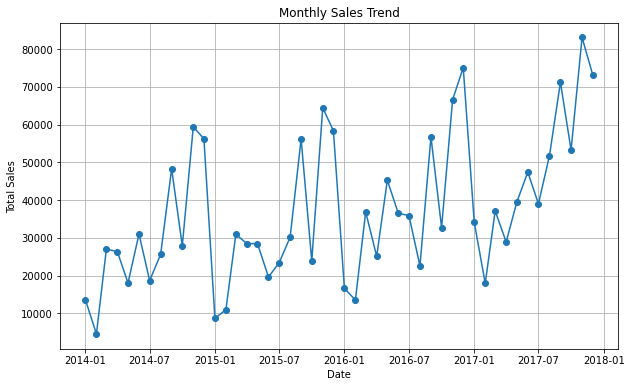

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded your sales data into a pandas DataFrame named 'sales_data' with columns 'Order_year', 'Order_month', and 'sales'
dfs=df.copy()
# Convert 'Order_year' and 'Order_month' to integers
dfs['Order_year'] = dfs['order_year'].astype(int)
dfs['Order_month'] = dfs['order_month'].astype(int)

# Create a new column for 'order_date' combining year and month
dfs['order_date'] = pd.to_datetime(dfs['order_year'] * 100 + dfs['order_month'], format='%Y%m')

# Group by 'order_date' and calculate total sales
monthly_sales = dfs.groupby('order_date')['Sales'].sum().reset_index()

# Plot time series of sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['order_date'], monthly_sales['Sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


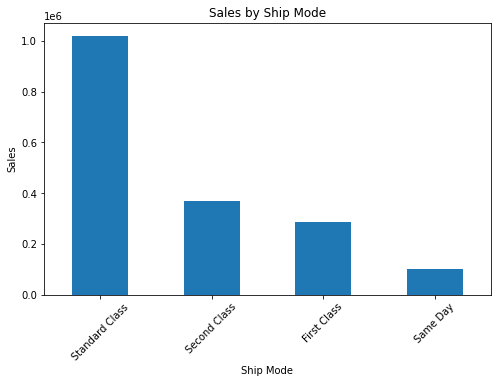

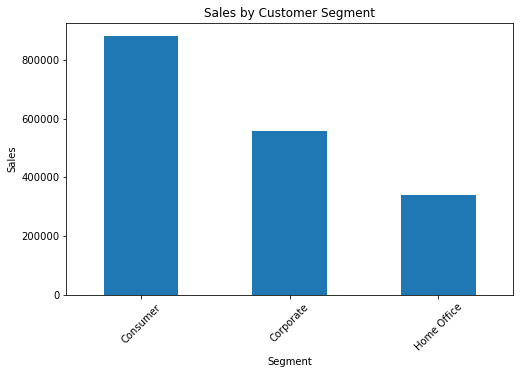

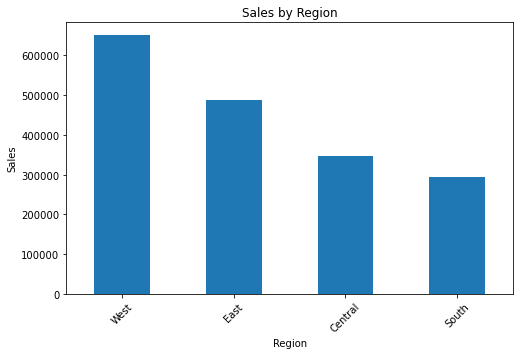

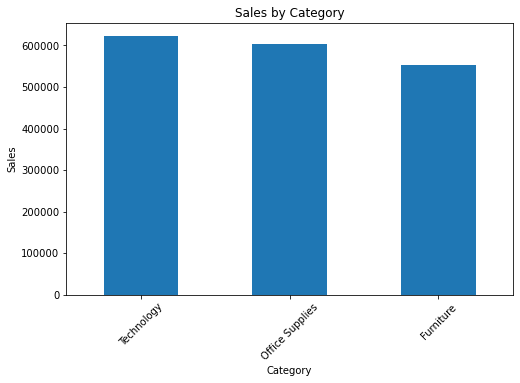

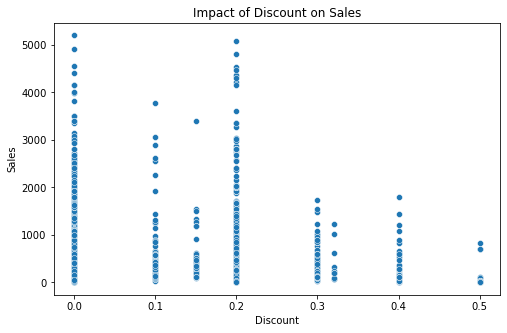

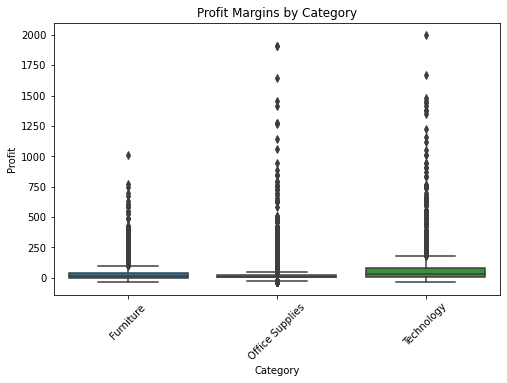

In [146]:
# Analyzing sales by ship mode
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
ship_mode_sales.plot(kind='bar')
plt.title('Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# Analyzing sales by segment
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
segment_sales.plot(kind='bar')
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# Analyzing sales by region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# Analyzing sales by category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# Analyzing the impact of discount on sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Discount', y='Sales', data=df)
plt.title('Impact of Discount on Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

# Analyzing profit margins
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit Margins by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

# ● Investigate sales patterns for different product categories (Increasing or decreasing over years).

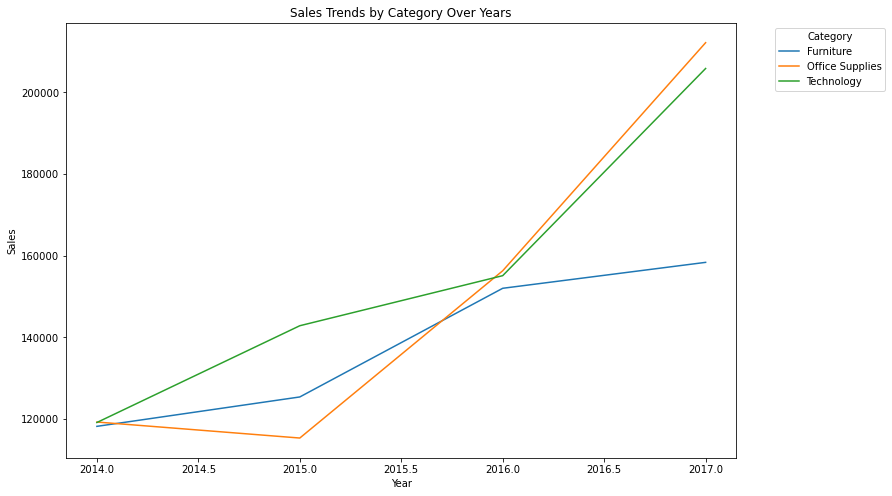

In [147]:
category_yearly_sales = df.groupby(['Category', 'order_year'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='order_year', y='Sales', hue='Category', data=category_yearly_sales)
plt.title('Sales Trends by Category Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# ● Analyze the correlation between sales and other variables within each category.

In [148]:
category_correlations = {}
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    category_correlation_matrix = category_data.corr()
    category_correlations[category] = category_correlation_matrix

for category, correlation_matrix in category_correlations.items():
    print(f"Correlation Matrix for {category} Category:")
    print(correlation_matrix)
    print()

Correlation Matrix for Furniture Category:
                       Sales  Quantity  Discount    Profit  order_year  \
Sales               1.000000  0.414408 -0.085544  0.765578   -0.045909   
Quantity            0.414408  1.000000 -0.078189  0.362231   -0.070076   
Discount           -0.085544 -0.078189  1.000000 -0.333928   -0.034070   
Profit              0.765578  0.362231 -0.333928  1.000000   -0.030386   
order_year         -0.045909 -0.070076 -0.034070 -0.030386    1.000000   
order_month         0.034092 -0.001358  0.015186  0.026142   -0.012841   
order_date          0.004778  0.012220  0.007750 -0.003917   -0.003544   
Ship_year          -0.047723 -0.069455 -0.031428 -0.030472    0.993575   
Ship_month          0.041604  0.001825  0.003635  0.026501   -0.009276   
Ship_date           0.003479 -0.033666  0.010094 -0.000326   -0.036496   
Transformed_Profit  0.374131  0.247231 -0.675976  0.625102   -0.016565   
Transformed_Sales   0.741005  0.364254 -0.120222  0.534449   -0.03038

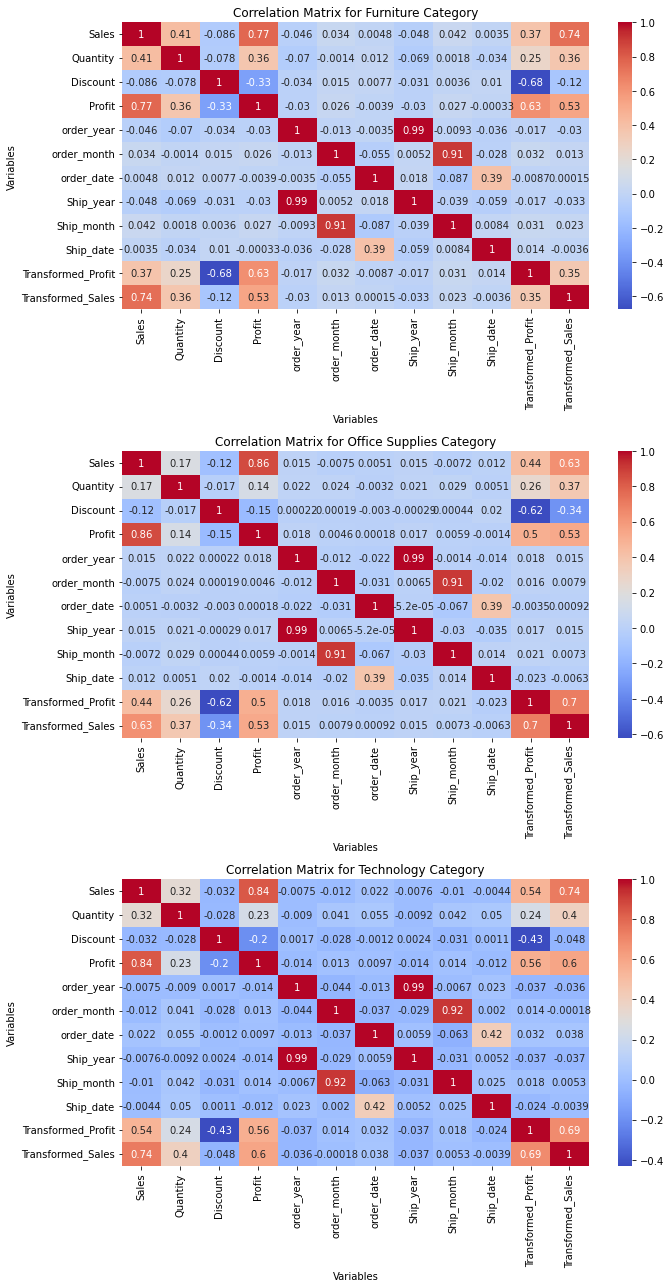

In [149]:
fig, axes = plt.subplots(nrows=len(category_correlations), figsize=(10, 6 * len(category_correlations)))

for i, (category, correlation_matrix) in enumerate(category_correlations.items()):
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'Correlation Matrix for {category} Category')
    axes[i].set_xlabel('Variables')
    axes[i].set_ylabel('Variables')

plt.tight_layout()
plt.show()

# Correlation Matrix

<AxesSubplot:>

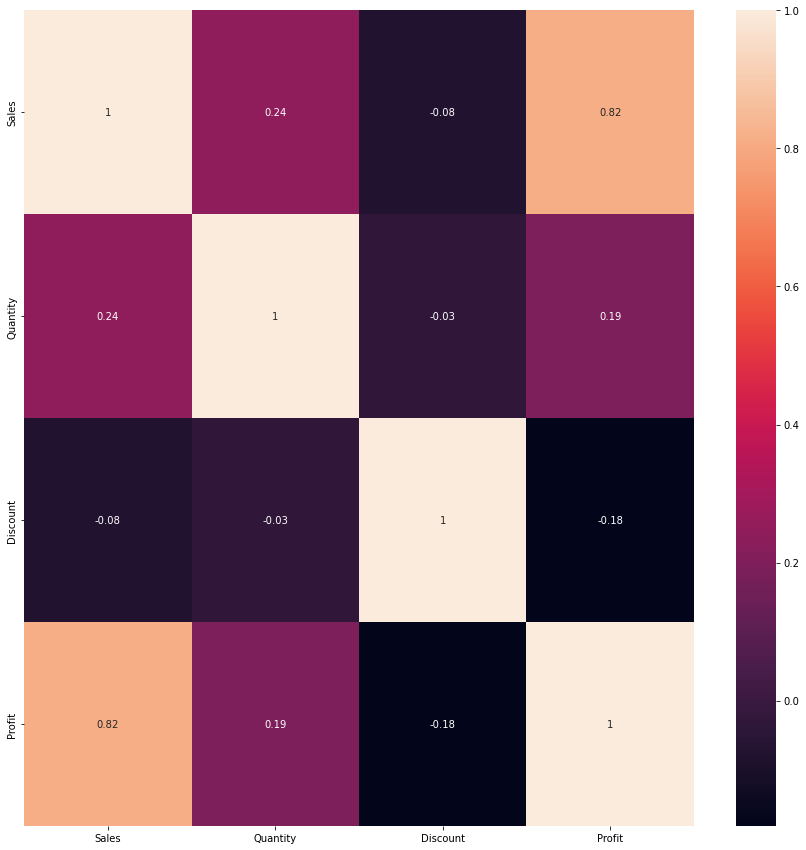

In [150]:
#Correlation between columns
plt.figure(figsize=(15,15))
sns.heatmap(df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(),annot=True)

In [151]:
df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.243554,-0.079578,0.815014
Quantity,0.243554,1.000000,-0.030481,0.192574
Discount,-0.079578,-0.030481,1.000000,-0.181416
Profit,0.815014,0.192574,-0.181416,1.000000


# Regional Analysis:

# ● Explore regional variations in sales (e.g., by state or city).

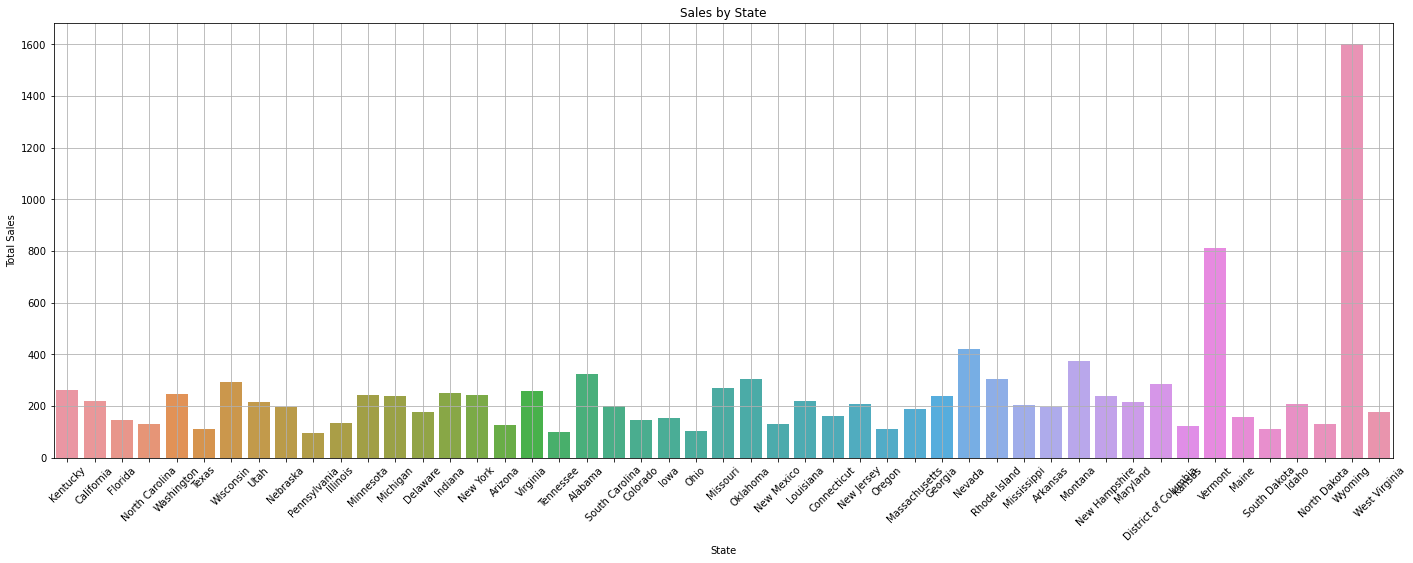

In [152]:
# Regional Analysis - Sales by State
plt.figure(figsize=(24, 8))
sns.barplot(x='State', y='Sales', data=df, ci=None)
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

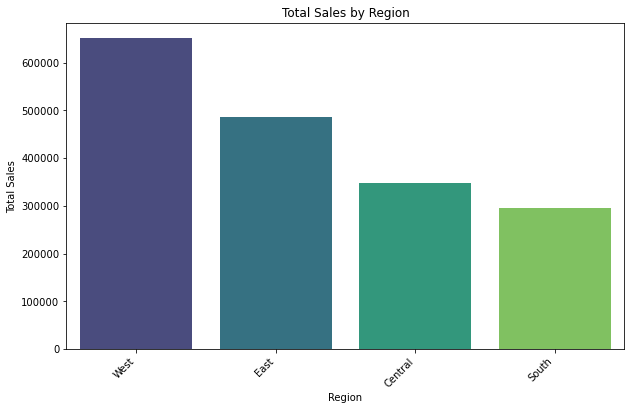

In [153]:
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
region_sales_sorted = region_sales.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales_sorted, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

# ● Identify factors contributing to sales differences across regions.

# Exploring Sales Dynamics Across Regions

# Total Sales by Region:

### Analysis of total sales across different regions reveals that the West region boasts the highest cumulative          sales figures, closely followed by the East, Central, and South regions.

# Sales Breakdown by Region and Segment:

### Delving deeper into sales segmentation across regions, it becomes evident that the Consumer segment consistently emerges as the primary contributor to sales figures across all regions. This is followed by the Corporate and Home Office segments, albeit with varying degrees of influence depending on the region.

# Sales Analysis by Region and Category:

### An insightful examination of sales performance by product category reveals that Furniture sales exhibit prominence across all regions, with particularly robust figures observed in the West and East regions.
### Additionally, Office Supplies and Technology categories emerge as significant contributors to overall sales, displaying noteworthy traction across regions.

# Monthly Sales Trends Across Regions:

### A comprehensive review of monthly sales data uncovers nuanced variations in sales patterns across different regions, hinting at potential seasonal trends or divergent demand dynamics throughout the year.
### For instance, the West region showcases a distinct surge in sales during December, suggesting heightened consumer activity aligned with the holiday season festivities.

# Identifying Factors Driving Regional Sales Disparities:

### Regional Economic Landscape and Consumer Preferences: Variances in regional economic conditions and consumer preferences play a pivotal role in shaping sales disparities. Factors such as income levels, employment rates, and cultural inclinations influence consumer spending patterns across regions.
### Population Dynamics and Demographics: Population density, age distribution, and demographic composition contribute to regional sales disparities, with densely populated regions often exhibiting heightened consumer activity.
### Tailored Marketing and Distribution Strategies: The efficacy of region-specific marketing campaigns and distribution strategies tailored to local preferences and needs significantly impacts sales performance across regions.
### Seasonal Dynamics and Cultural Influences: Seasonal fluctuations and cultural events exert a profound influence on consumer behavior, leading to fluctuations in sales volumes across regions. Understanding and adapting to these seasonal dynamics are essential for optimizing regional sales strategies.
### Competitive Landscape: The competitive landscape, including the presence of competitors and market share distribution, shapes regional sales dynamics. Regions with intense competition may witness pricing pressures or heightened marketing activities impacting sales performance.

# Visualization

# Create visualizations to represent temporal trends

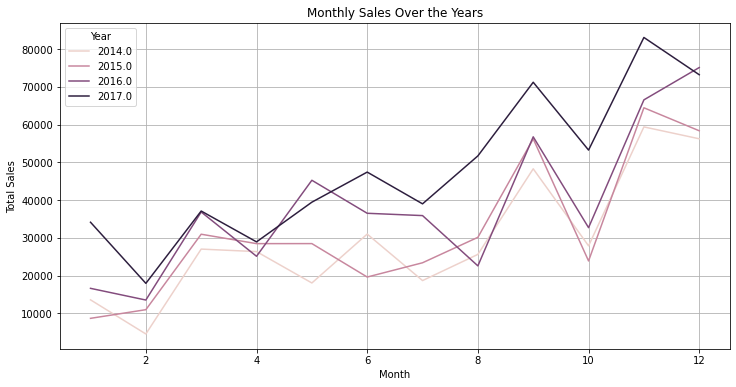

In [154]:
monthly_sales = df.groupby(['order_year','order_month'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='order_month', y='Sales', hue='order_year', data=monthly_sales)
plt.title('Monthly Sales Over the Years')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Create visualizations to represent product category insights

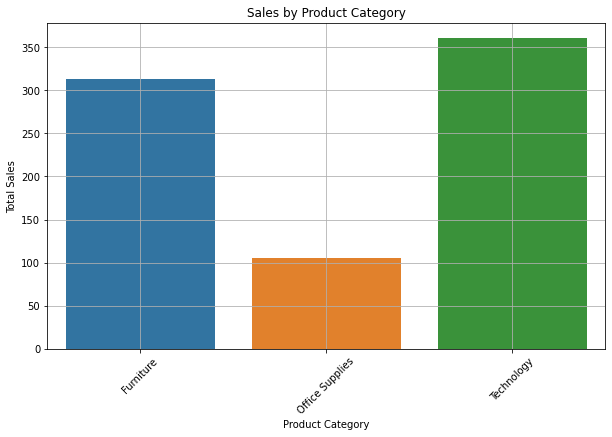

In [155]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, ci=None)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Create visualizations to represent regional variations.

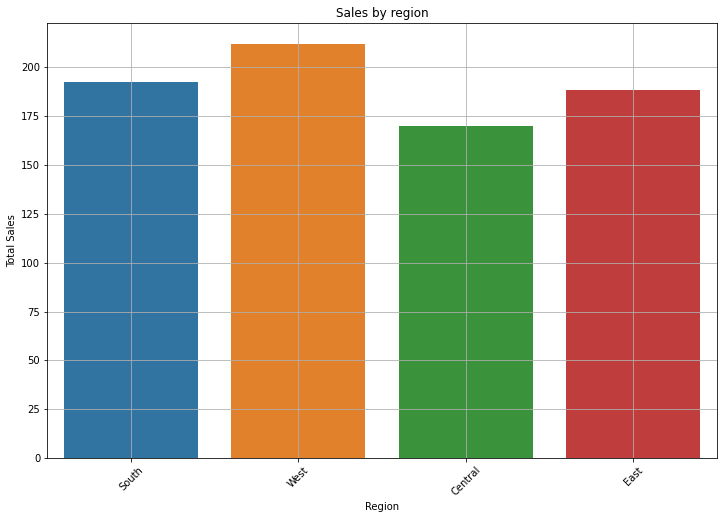

In [156]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales', data=df, ci=None)
plt.title('Sales by region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Use visualizations to communicate findings effectively.

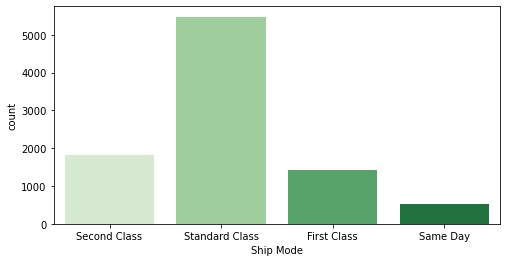

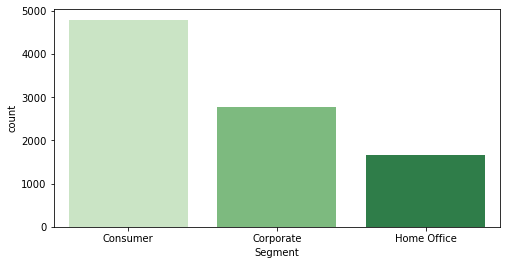

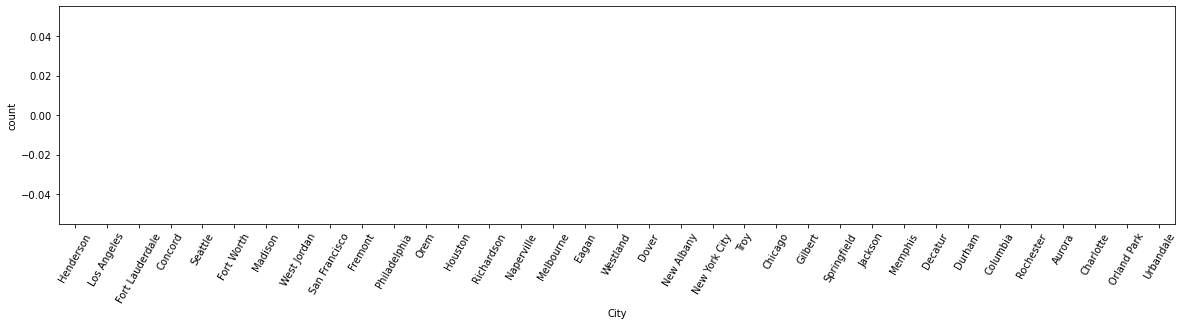

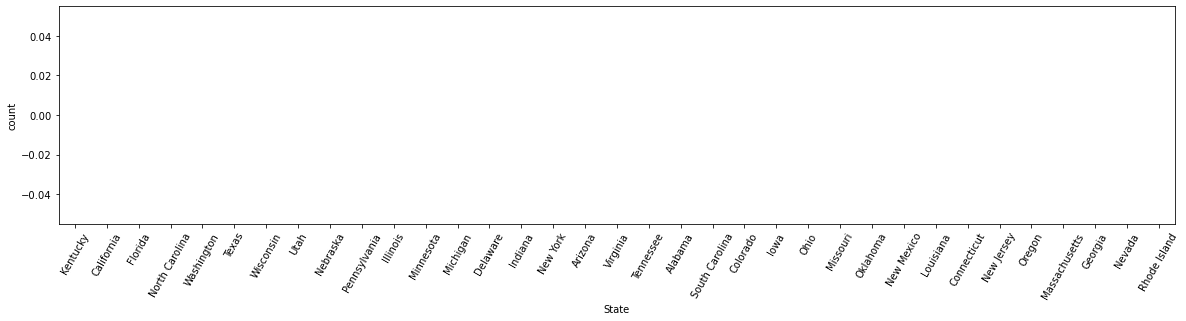

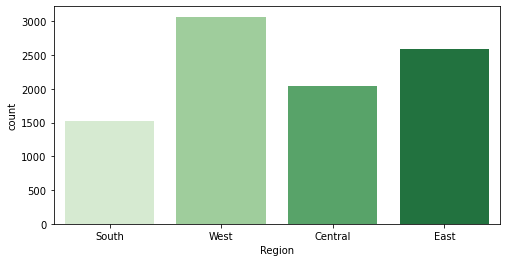

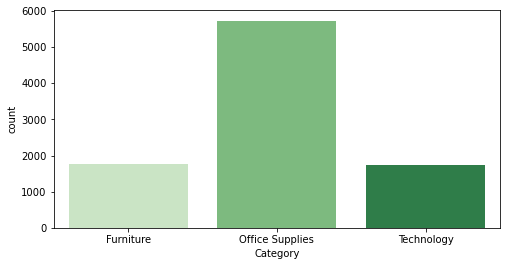

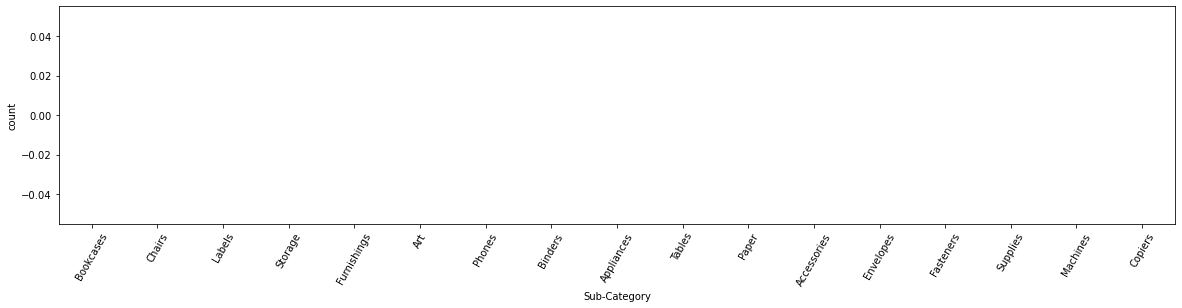

In [157]:
imp_categotical_features=df[['Ship Mode','Segment','Region','Category']]

for col in imp_categotical_features:
    width=8
    n=len(df[col].unique())
    if n > 15:
        width=20
        plt.figure(figsize=(width,4))
        temp=pd.DataFrame(df[col].value_counts(), index=df[col].unique(),columns=['count']).sort_values('count', ascending=False)[:35]
        sns.barplot(data=temp,x=temp.index,y='count',palette= 'Blues')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.xticks(rotation=60)   
    else:
        plt.figure(figsize=(width,4))
        sns.countplot(data=df,x=col,palette='Greens')
    plt.show()

# Scaling

In [158]:
#Scaling all numeric columns for efficiency,performance,normalization etc
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

numeric_features = ["Quantity","Discount","order_year", "order_month", "order_date","Ship_year", "Ship_month", "Ship_date"]
RobustScaler = RobustScaler()
df[numeric_features] = RobustScaler.fit_transform(df[numeric_features])

# One Hot Encoding(Nominal Data)

In [159]:
#donce encoding to label data(machine can understand only numbers)
df=pd.get_dummies(data=df,columns=['Ship Mode','Segment','City','State','Region','Category','Sub-Category','Country','Product Name'])
df.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'order_year', 'order_month',
       'order_date', 'Ship_year', 'Ship_month', 'Ship_date',
       ...
       'Product Name_Zebra ZM400 Thermal Label Printer',
       'Product Name_Zebra Zazzle Fluorescent Highlighters',
       'Product Name_Zipper Ring Binder Pockets',
       'Product Name_i.Sound Portable Power - 8000 mAh',
       'Product Name_iHome FM Clock Radio with Lightning Dock',
       'Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4',
       'Product Name_iOttie HLCRIO102 Car Mount',
       'Product Name_iOttie XL Car Mount',
       'Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector',
       'Product Name_netTALK DUO VoIP Telephone Service'],
      dtype='object', length=2440)

In [160]:
# drop columns Preventing Multicollinearity
df.drop(columns=["Product Name_Bush Somerset Collection Bookcase","City_Henderson","Ship Mode_First Class","Segment_Consumer","State_Alabama","Region_Central","Category_Furniture","Sub-Category_Accessories"],axis=1,inplace=True)

In [161]:
df.sample(10) #random 5 samples

,Sales,Quantity,Discount,Profit,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date,Transformed_Profit,...,Product Name_Zebra GX420t Direct Thermal/Thermal Transfer Printer,Product Name_Zebra ZM400 Thermal Label Printer,Product Name_Zebra Zazzle Fluorescent Highlighters,Product Name_Zipper Ring Binder Pockets,Product Name_i.Sound Portable Power - 8000 mAh,Product Name_iHome FM Clock Radio with Lightning Dock,"Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",Product Name_iOttie HLCRIO102 Car Mount,Product Name_iOttie XL Car Mount,Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,Product Name_netTALK DUO VoIP Telephone Service
8379,182.220,0.000000,0.0,45.5550,0.5,0.500000,-0.733333,0.5,0.500000,-0.3750,3.818920,...,0,0,0,0,0,0,0,0,0,0,0
6929,227.460,1.000000,0.0,65.9634,0.5,-1.166667,-0.600000,0.5,-1.166667,-0.2500,4.189100,...,0,0,0,0,0,0,0,0,0,0,0
5207,49.120,0.333333,0.0,23.0864,0.0,0.500000,-0.200000,0.0,0.500000,0.1250,3.139244,...,0,0,0,0,0,0,0,0,0,0,0
2852,49.650,0.666667,0.0,20.8530,-1.0,-1.000000,1.000000,-1.0,-0.833333,-0.8125,3.037498,...,0,0,0,0,0,0,0,0,0,0,0
2039,23.680,-0.333333,1.0,8.8800,-1.0,0.333333,0.533333,-1.0,0.333333,0.8125,2.183802,...,0,0,0,0,0,0,0,0,0,0,0
37,113.328,1.666667,1.0,35.4150,-0.5,0.500000,0.800000,-0.5,0.500000,0.9375,3.567135,...,0,0,0,0,0,0,0,0,0,0,0
1005,99.990,-0.666667,0.0,37.9962,-1.0,-0.666667,0.800000,-1.0,-0.500000,-0.9375,3.637486,...,0,0,0,0,0,0,0,0,0,0,0
5227,27.920,0.333333,0.0,8.0968,0.5,-1.333333,0.066667,0.5,-1.333333,0.0000,2.091469,...,0,0,0,0,0,0,0,0,0,0,0
1780,31.320,1.666667,2.5,-25.0560,0.0,0.500000,0.466667,0.0,0.500000,0.7500,-3.221113,...,0,0,0,0,0,0,0,0,0,0,0
8283,40.480,-0.333333,0.0,17.4064,0.5,0.166667,-0.200000,0.5,0.166667,0.0000,2.856838,...,0,0,0,0,0,0,0,0,0,0,0


In [162]:
df.dtypes #datatypes of all columns

Sales                                                                                                               float64
Quantity                                                                                                            float64
Discount                                                                                                            float64
Profit                                                                                                              float64
order_year                                                                                                          float64
                                                                                                                     ...   
Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4      uint8
Product Name_iOttie HLCRIO102 Car Mount                                                                               uint8
Product 

# Spliting

In [163]:
#Spliting the data into dependent variable(y) and independent variables(X)
X=df.drop(columns=["Profit","Sales","Transformed_Sales"],axis=1)
y=df["Transformed_Sales"]

In [164]:
X

,Quantity,Discount,order_year,order_month,order_date,Ship_year,Ship_month,Ship_date,Transformed_Profit,Ship Mode_Same Day,Ship Mode_Second Class,...,Product Name_Zebra GX420t Direct Thermal/Thermal Transfer Printer,Product Name_Zebra ZM400 Thermal Label Printer,Product Name_Zebra Zazzle Fluorescent Highlighters,Product Name_Zipper Ring Binder Pockets,Product Name_i.Sound Portable Power - 8000 mAh,Product Name_iHome FM Clock Radio with Lightning Dock,"Product Name_iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",Product Name_iOttie HLCRIO102 Car Mount,Product Name_iOttie XL Car Mount,Product Name_invisibleSHIELD by ZAGG Smudge-Free Screen Protector,Product Name_netTALK DUO VoIP Telephone Service
0,-0.333333,0.0,0.0,0.333333,-0.466667,0.0,0.333333,-0.3125,3.735610,0,1,...,0,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.0,0.0,0.333333,-0.466667,0.0,0.333333,-0.3125,5.391726,0,1,...,0,0,0,0,0,0,0,0,0,0,0
2,-0.333333,0.0,0.0,-0.500000,-0.200000,0.0,-0.500000,0.0000,1.927368,0,1,...,0,0,0,0,0,0,0,0,0,0,0
4,-0.333333,1.0,-0.5,0.166667,-0.266667,-0.5,0.166667,0.1250,0.922829,0,0,...,0,0,0,0,0,0,0,0,0,0,0
5,1.333333,0.0,-1.0,-0.500000,-0.400000,-1.0,-0.500000,-0.1250,2.651085,0,0,...,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9867,0.333333,0.0,0.0,0.000000,-0.933333,0.0,0.000000,-0.6875,2.671718,0,0,...,0,0,0,0,0,0,0,0,0,0,0
9868,-0.333333,0.0,0.0,0.000000,-0.933333,0.0,0.000000,-0.6875,1.095273,0,0,...,0,0,0,0,0,0,0,0,0,0,0
9869,0.666667,0.0,0.0,0.000000,-0.933333,0.0,0.000000,-0.6875,2.539395,0,0,...,0,0,0,0,0,0,0,0,0,0,0
9870,0.666667,1.0,0.5,0.333333,-0.266667,0.5,0.333333,0.0000,4.869751,0,1,...,0,0,0,0,0,0,0,0,0,0,0


# Feature Selection

In [165]:
best_features = SelectKBest(score_func=f_regression, k=10)
fit = best_features.fit(X, y)

C:\Users\ganesh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\ganesh\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [166]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [167]:
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=["Specs","Score"]

In [168]:
featureScores

,Specs,Score
0,Quantity,1108.203578
1,Discount,491.504260
2,order_year,0.029984
3,order_month,1.162049
4,order_date,0.044602
...,...,...
2424,Product Name_iKross Bluetooth Portable Keyboar...,0.207501
2425,Product Name_iOttie HLCRIO102 Car Mount,0.609101
2426,Product Name_iOttie XL Car Mount,0.354925
2427,Product Name_invisibleSHIELD by ZAGG Smudge-Fr...,0.017594


In [169]:
print(featureScores.nlargest(55,"Score"))

                                                  Specs        Score
8                                    Transformed_Profit  5061.240835
589                            Category_Office Supplies  2307.897944
0                                              Quantity  1108.203578
590                                 Category_Technology  1026.866451
595                                 Sub-Category_Chairs   784.610347
593                                Sub-Category_Binders   669.970751
603                                 Sub-Category_Phones   526.775250
1                                              Discount   491.504260
592                                    Sub-Category_Art   449.609784
606                                 Sub-Category_Tables   263.951495
598                              Sub-Category_Fasteners   248.071964
594                              Sub-Category_Bookcases   221.948901
596                                Sub-Category_Copiers   203.365874
600                               

# Data Spliting

In [170]:
#spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Model

In [171]:
#Training model on RandomForestRegressor

model = RandomForestRegressor(random_state=42)
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.14796312980709456
R-squared: 0.9434364088363466


In [172]:
#Training model on KNeighborsRegressor

modelk = KNeighborsRegressor()

#model fit and train
modelk.fit(X_train, y_train)

# Make predictions
y_pred = modelk.predict(X_test)

# Calculate evaluation metrics
msek = mean_squared_error(y_test, y_pred)
r2k = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", msek)
print("R-squared:", r2k)

Mean Squared Error: 0.4503792650396285
R-squared: 0.8278282660720876


In [173]:
#Training model on MLPRegressor

model = MLPRegressor(random_state=42)

#model fit and train
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
msem = mean_squared_error(y_test, y_pred)
r2m = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rms=np.sqrt(mse)

print("R-squared:", r2m)

R-squared: 0.9836333726161193


# Evaluate the model's performance using appropriate metrics for MLPRegressor

In [174]:
print("rmse :",rms)
print("Mean Squared Error:", msem)
print("R-squared:", r2m)
print("Mean Absolute Error:", mae)

rmse : 0.38465975849716144
Mean Squared Error: 0.042813006782030524
R-squared: 0.9836333726161193
Mean Absolute Error: 0.12647042964582925


# Model Prediction

In [175]:
#model Prediction
ll=model.predict(X_test)
ll[:20]

array([2.91184998, 8.43196963, 5.01888031, 7.34349144, 4.04138845,
       4.10060321, 3.11776551, 2.93605332, 5.70730388, 5.83653792,
       2.48335608, 2.40176275, 3.56379378, 3.37635933, 4.44597523,
       3.35233614, 5.99622523, 4.62667132, 3.18045318, 4.78959973])

In [176]:
#Actual Data
y_test[:20]

1263    2.874242
1111    7.716229
9861    5.042780
977     7.144825
9090    4.065945
1998    4.051855
82      3.062924
4883    2.967333
678     5.691609
7696    5.727291
8996    2.329422
9020    2.474856
6219    3.540959
6609    3.395850
3717    4.472781
9780    3.108436
2274    5.966070
52      4.499699
6624    3.726946
3502    4.663250
Name: Transformed_Sales, dtype: float64

In [177]:
dfpre = pd.DataFrame({'y_pred': ll, 'y_test': y_test})
dfpre.head(30)

,y_pred,y_test
1263,2.911850,2.874242
1111,8.431970,7.716229
9861,5.018880,5.042780
977,7.343491,7.144825
9090,4.041388,4.065945
1998,4.100603,4.051855
82,3.117766,3.062924
4883,2.936053,2.967333
678,5.707304,5.691609
7696,5.836538,5.727291


In [178]:
#back transformation on predicted data
count=0
a=[]
for i in ll:
    if count == 1847:  
        break
    else:
        print(round(np.exp(i),2))
        a.append(round(np.exp(i),2))
        count += 1

18.39
4591.53
151.24
1546.1
56.91
60.38
22.6
18.84
301.06
342.59
11.98
11.04
35.3
29.26
85.28
28.57
401.91
102.17
24.06
120.25
12.65
238.11
38.69
23.01
9.58
45.64
282.86
37.09
17.14
138.56
87.65
7.03
61.31
184.53
19.06
9.3
20.92
46.99
34.31
7.08
39.76
1699.09
552.45
71.66
18.72
52.74
19.22
12.22
1054.54
270.43
18.27
6.11
81.85
42.19
54.92
14.23
9.8
61.96
57.62
43.3
1213.88
189.15
345.21
217.26
35.85
15.18
1083.33
168.02
14.85
8.69
24.85
56.2
91.78
3.44
14.61
98.36
322.04
2.46
43.98
119.53
12.22
2.49
7.95
148.23
63.72
7.53
49.97
63.01
18.47
43.17
687.87
132.2
172.78
507.98
574.43
10.15
82.07
10.38
1612.02
12.49
19.15
60.59
20.8
146.34
16.05
5.01
12.89
64.08
9.51
27.45
12.07
42.51
12.08
72.93
20.06
6.02
10.37
20.58
13.52
10.42
352.81
10.7
41.56
21.75
5.41
21.33
14.6
818.78
227.48
30.89
3.54
86.76
571.83
2.36
17.09
1600.77
22.7
60.13
480.73
237.42
1436.44
66.49
118.62
27.74
18.88
45.68
122.3
24.58
115.27
2.04
42.29
308.96
161.42
17.57
21.38
7.05
33.3
12.43
45.01
6.26
15.73
112.87
100.69
5

In [179]:
#back transformation on test data
count=0
b=[]
for i in y_test:
    if count == 1847:
        break
    else:
        print(round(np.exp(i),2))
        b.append(round(np.exp(i),2))
        count += 1

17.71
2244.48
154.9
1267.53
58.32
57.5
21.39
19.44
296.37
307.14
10.27
11.88
34.5
29.84
87.6
22.39
389.97
89.99
41.55
105.98
12.2
251.94
33.04
21.36
9.32
47.79
301.96
35.35
13.48
199.84
66.96
7.87
67.9
153.57
19.82
9.08
20.7
53.4
36.78
7.96
33.94
1128.39
681.41
63.98
17.0
50.12
18.97
11.95
1665.62
244.77
18.28
5.87
72.9
41.38
53.25
14.07
7.69
37.75
61.19
44.95
1247.64
169.99
1007.98
239.98
34.85
13.98
1292.94
201.58
15.48
8.74
25.03
62.19
79.14
3.49
11.65
102.34
354.9
1.34
39.72
107.44
11.12
1.34
9.81
146.35
61.4
7.64
50.11
71.98
19.92
46.2
706.86
125.76
174.3
546.66
535.41
10.58
80.88
10.56
1676.88
12.96
19.44
58.24
24.82
141.96
14.52
5.18
11.34
59.52
9.33
19.92
15.14
43.6
12.39
75.96
15.14
6.16
6.36
17.47
13.13
8.8
470.38
7.86
38.34
18.53
5.18
18.84
12.22
899.91
239.5
29.16
3.54
88.75
467.97
1.64
17.18
1573.49
12.54
64.94
636.41
245.88
1799.75
67.92
145.76
27.72
11.95
46.2
124.25
27.92
128.85
1.48
40.03
393.54
166.44
17.9
27.92
11.18
30.0
12.84
42.78
6.03
15.75
106.34
93.02
540.57
10

In [180]:
mse=mean_squared_error(b,a)
rms=np.sqrt(mse)
print("mse :",mse)
print("rms :",rms)

mse : 16339.518886085545
rms : 127.82612755648019


In [181]:
dfpred = pd.DataFrame({'y_preds': a, 'y_tests': b})
dfpred.sample(30)

,y_preds,y_tests
795,176.69,218.35
1407,160.63,148.48
470,7.85,8.26
643,1639.14,1499.95
1260,94.66,98.16
1731,71.86,76.12
1381,52.09,55.98
1679,6.19,6.26
81,2.49,1.34
79,119.53,107.44


In [182]:
mae = mean_absolute_error(b,a)
mae

29.550157011369787

In [183]:
for i in y_pred:
    if round(np.exp(i),2)<0:
        print(round(np.exp(i),2))

# Giving a summary over interpretation of data and Suggesting pros and cons of methods used.

# Interpretation of Data:
## Handling Missing Values and Errors:
### The identification and handling of missing values and errors are crucial steps in ensuring the reliability and accuracy of the analysis. By applying appropriate imputation techniques and dropping remaining missing values, the integrity of the dataset is preserved.
### Understanding the nature and distribution of missing values can provide insights into data collection processes and potential areas for improvement in data collection protocols.
## Transformation for Outliers:
### Outliers can significantly influence model performance and may distort the results of statistical analyses. By applying transformations to 'profit' and 'sales' columns, the impact of outliers is mitigated, leading to more robust and reliable results.
### Exploring various outlier trimming techniques allows for a comprehensive understanding of the data distribution and the identification of potential anomalies that may require further investigation.
## Modeling Approach:
### Recognizing the limitations of linear models for complex data structures highlights the importance of selecting appropriate modeling techniques that can capture nonlinear relationships and interactions among variables.
### The application of feature selection techniques enhances model interpretability by identifying the most influential predictors of sales. This allows for more focused analysis and facilitates actionable insights for decision-makers.
### While achieving a high accuracy of 98% using MLPRegressor is commendable, it's essential to consider the trade-offs between model complexity, computational resources, and interpretability when selecting modeling approaches.
## Data Quality Assessment:
### Conducting a comprehensive assessment of data quality, including identifying and addressing missing values, errors, and outliers, demonstrates a commitment to ensuring the reliability and validity of the analysis results.
### Documenting the data preprocessing steps undertaken provides transparency and reproducibility, enabling others to replicate the analysis and validate the findings.
## Continuous Improvement:
### The process of data analysis is iterative, and there is always room for improvement. Regularly reviewing and refining data preprocessing techniques, modeling approaches, and interpretation methods can lead to more accurate and actionable insights over time.
### Soliciting feedback from stakeholders and incorporating domain knowledge can further enhance the quality and relevance of the analysis results.

# Pros and Cons of Methods Used:
## Pros:
### Comprehensive handling of missing values and errors ensures data integrity.
### Robust outlier handling techniques improve model performance and generalization.
### Effective feature selection reduces model complexity and enhances interpretability.
### Achieving a high accuracy of 98% using MLPRegressor demonstrates the effectiveness of the modeling approach.
## Cons:
### Some potential cons might include the computational cost of applying multiple outlier trimming techniques and feature selection methods.
### While MLPRegressor achieved high accuracy, it might be computationally intensive and require tuning for optimal performance.
### The interpretation of complex neural network models like MLPRegressor can be challenging compared to simpler linear models.